In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('lung cancer.csv')# Reading data
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
# Removing unnecessary columns
df.drop(['index','Patient Id'],axis=1,inplace=True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
#check if the data is clean
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [5]:
#Check if there is duplication
df.duplicated().sum()

848

In [6]:
df.drop_duplicates(inplace=True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,35,1,2,1,2,1,2,1,2,3,...,3,4,5,1,3,2,1,2,2,Low
977,45,1,3,1,4,3,2,3,4,3,...,3,2,2,4,2,2,3,4,3,Low
979,53,1,3,1,4,2,3,2,3,3,...,2,2,3,4,1,5,2,6,2,Low
983,26,1,3,2,4,2,3,2,3,3,...,4,5,6,5,5,4,6,5,4,Medium


In [7]:
#covert age column to categorical
def ageClassifier(x):
    if x <= 20:
        return '<20'
    elif x <= 40:
        return '21-40'
    elif x <= 60:
        return '41-60'
    elif x <= 80:
        return '61-80'
    else:
        return '>80'

df['Age'] = [ageClassifier(x) for x in df['Age']]
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,21-40,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,<20,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,21-40,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,21-40,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,41-60,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,21-40,1,2,1,2,1,2,1,2,3,...,3,4,5,1,3,2,1,2,2,Low
977,41-60,1,3,1,4,3,2,3,4,3,...,3,2,2,4,2,2,3,4,3,Low
979,41-60,1,3,1,4,2,3,2,3,3,...,2,2,3,4,1,5,2,6,2,Low
983,21-40,1,3,2,4,2,3,2,3,3,...,4,5,6,5,5,4,6,5,4,Medium


In [8]:
#covert all columns to category type
for i in df.columns:
    df[i] = df[i].astype('category')

In [9]:
#EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 984
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       152 non-null    category
 1   Gender                    152 non-null    category
 2   Air Pollution             152 non-null    category
 3   Alcohol use               152 non-null    category
 4   Dust Allergy              152 non-null    category
 5   OccuPational Hazards      152 non-null    category
 6   Genetic Risk              152 non-null    category
 7   chronic Lung Disease      152 non-null    category
 8   Balanced Diet             152 non-null    category
 9   Obesity                   152 non-null    category
 10  Smoking                   152 non-null    category
 11  Passive Smoker            152 non-null    category
 12  Chest Pain                152 non-null    category
 13  Coughing of Blood         152 non-null    category

In [11]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
unique,4,2,8,8,8,8,7,7,7,7,...,8,8,8,8,8,9,7,7,7,3
top,21-40,1,6,2,7,7,7,6,7,7,...,3,2,2,2,1,2,3,2,2,High
freq,88,89,46,33,59,51,47,46,43,52,...,34,44,36,34,31,37,34,38,42,53


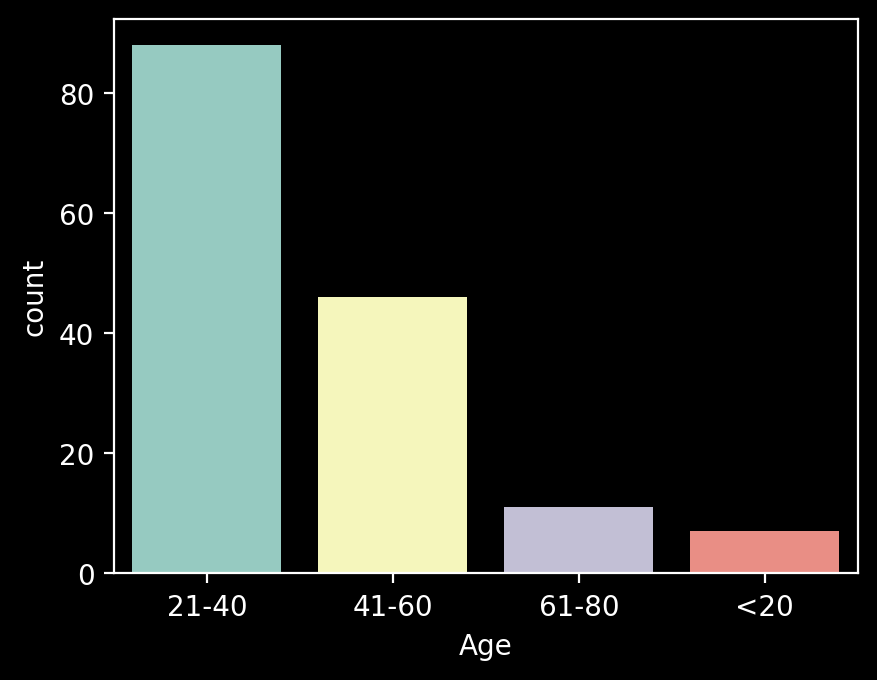

In [12]:
#diplay Age count
sns.countplot(data=df,x='Age');

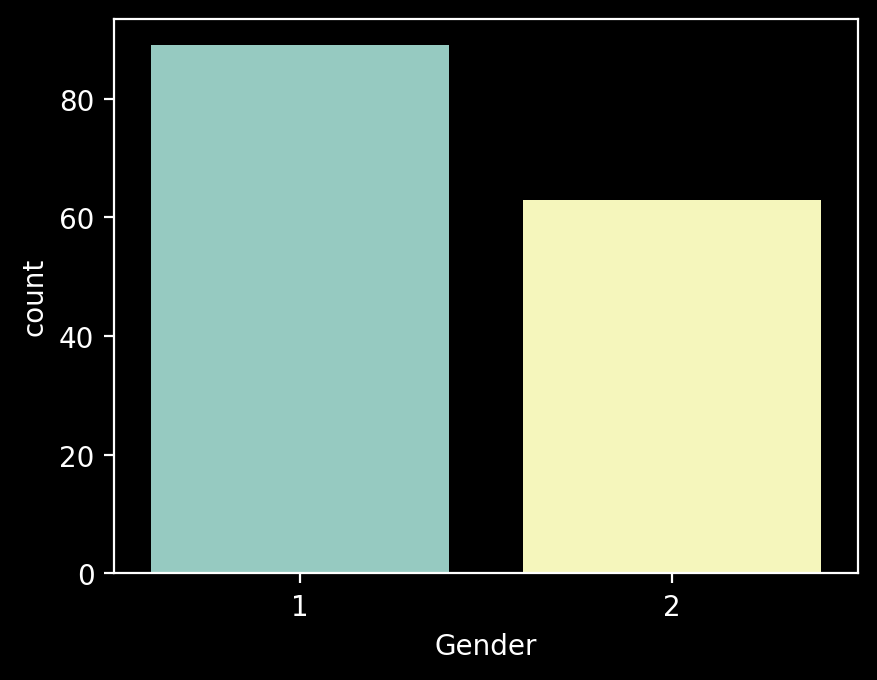

In [13]:
#diplay Gender count
sns.countplot(data=df,x='Gender');

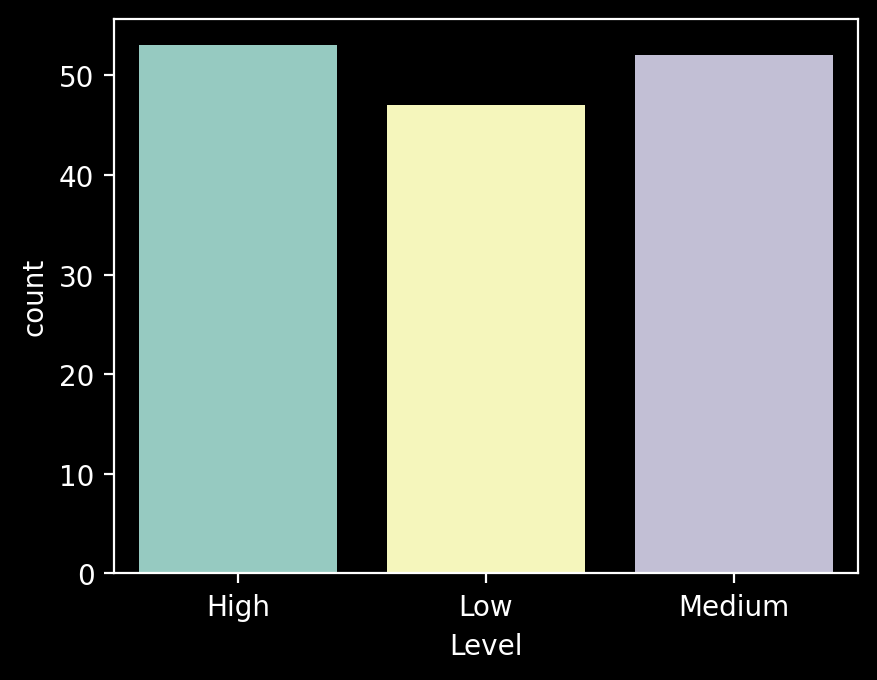

In [14]:
#diplay Level count
sns.countplot(data=df,x='Level');

<ipython-input-15-2b1d13b98172>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,6));


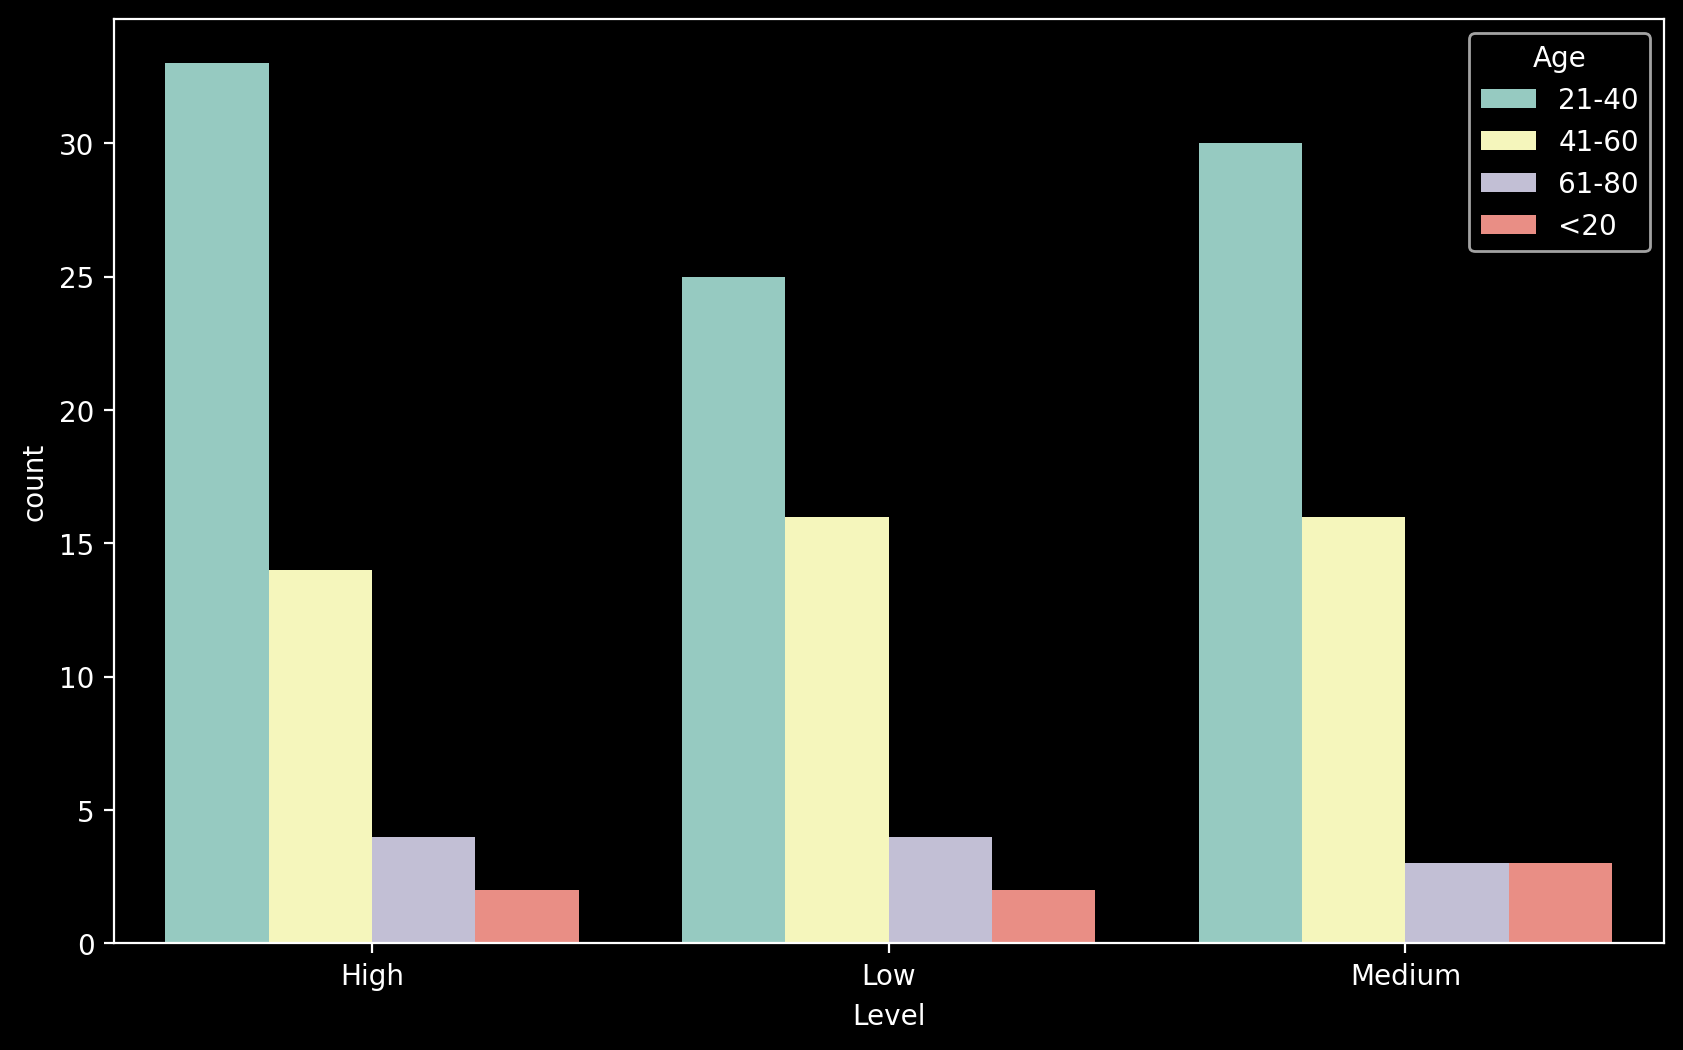

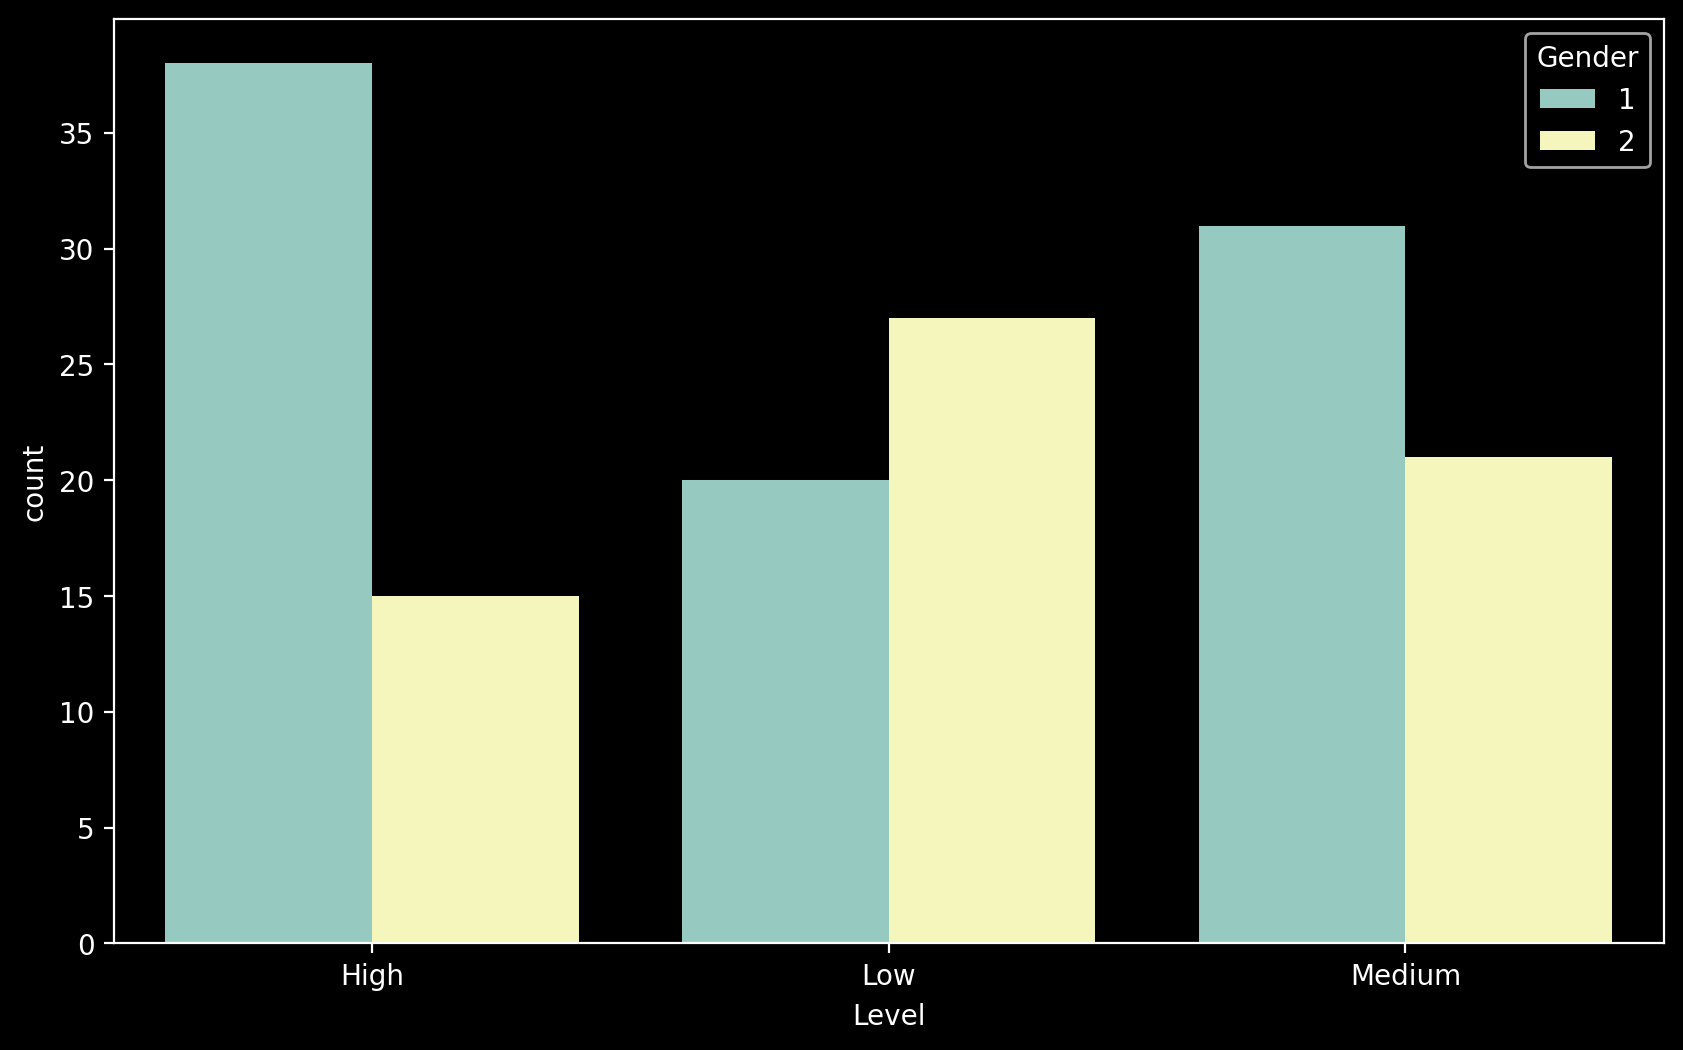

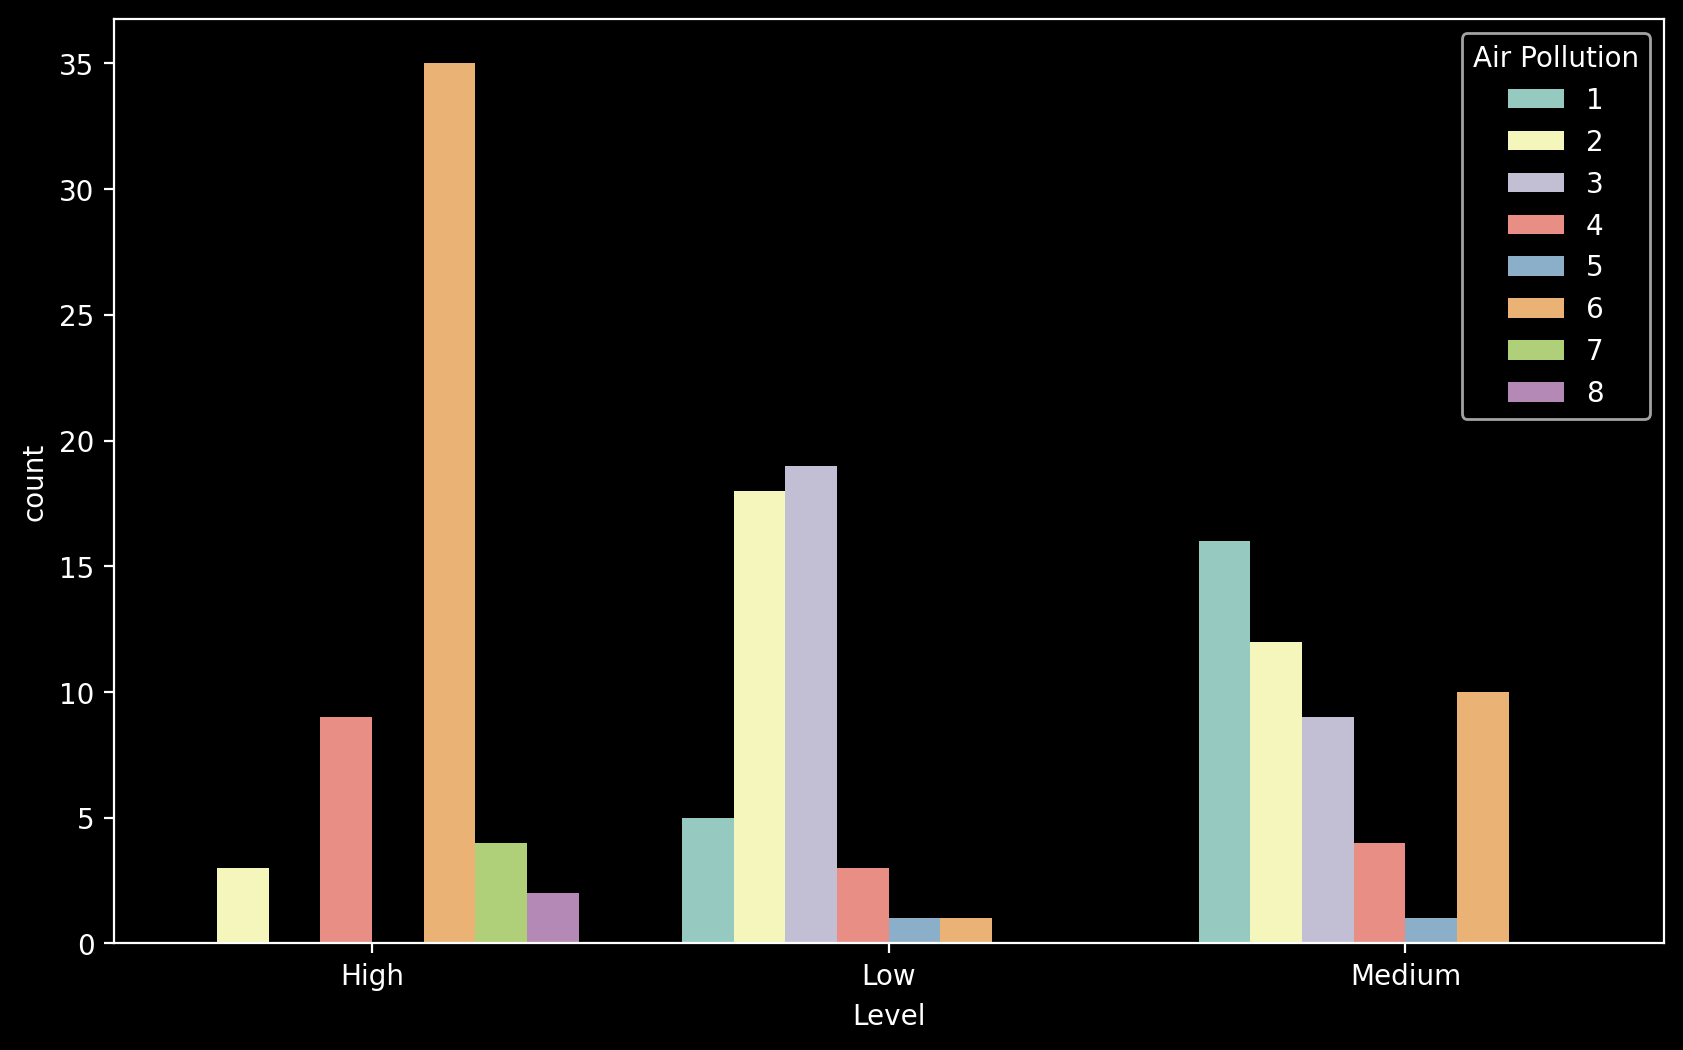

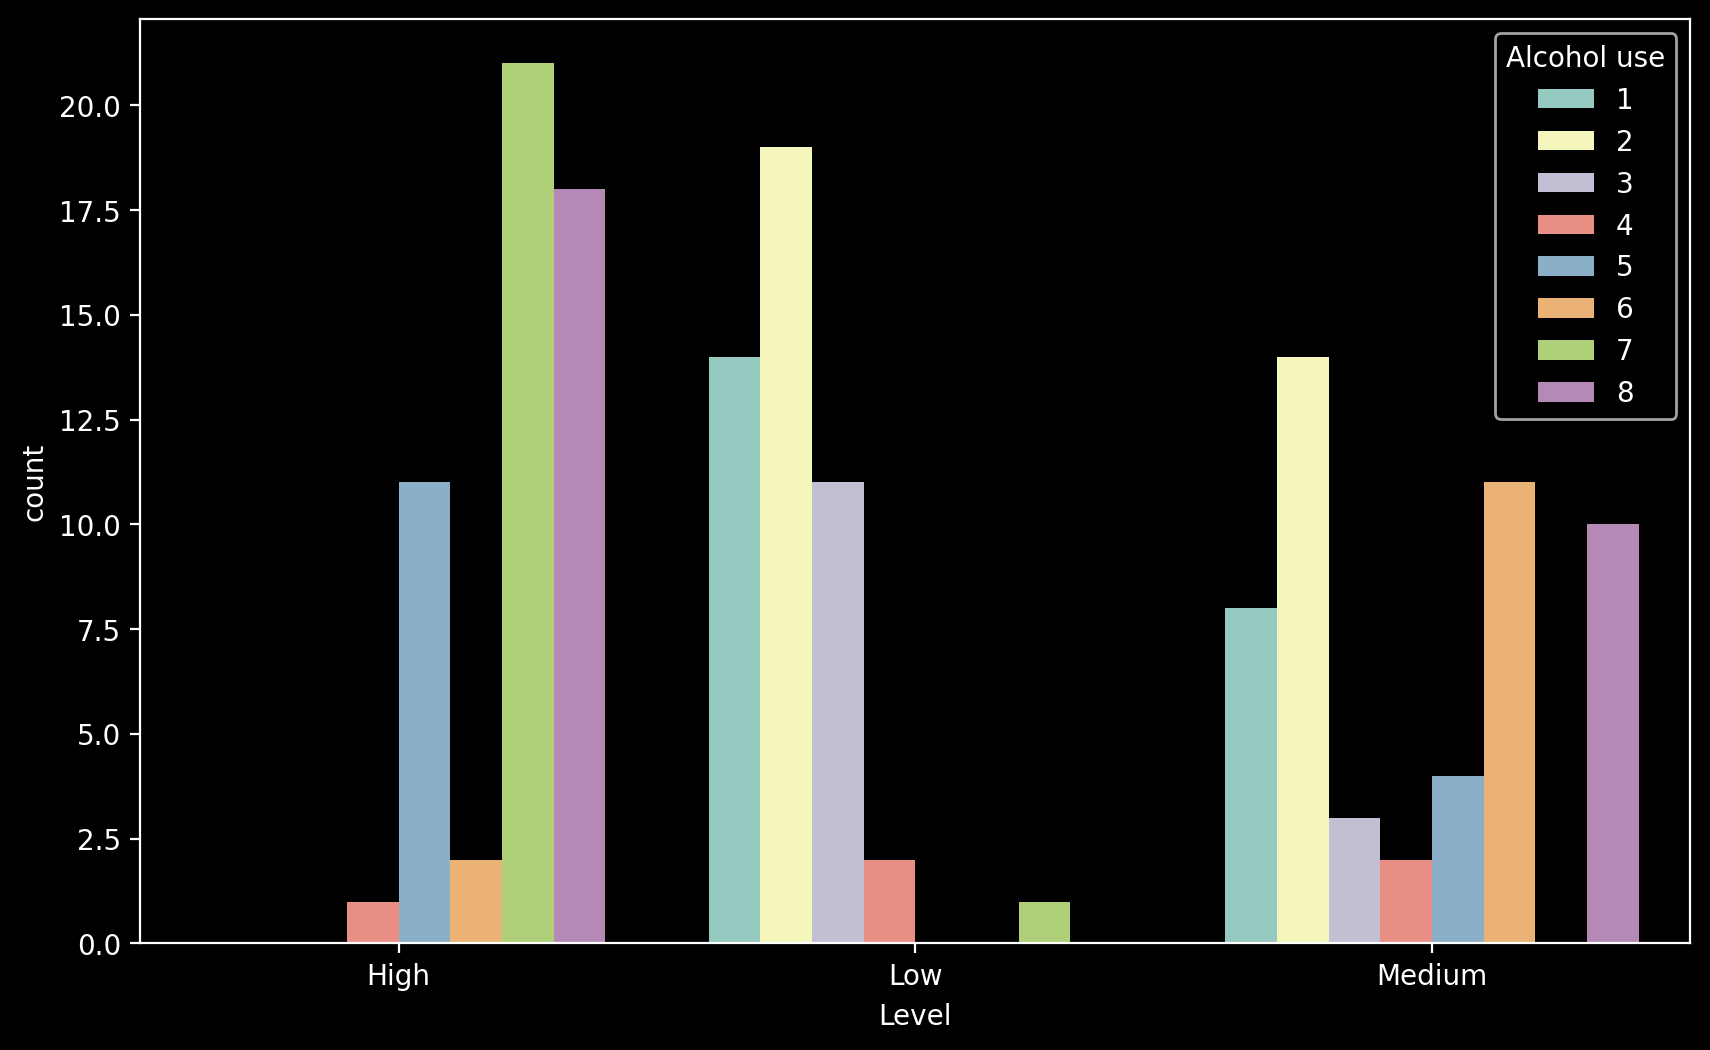

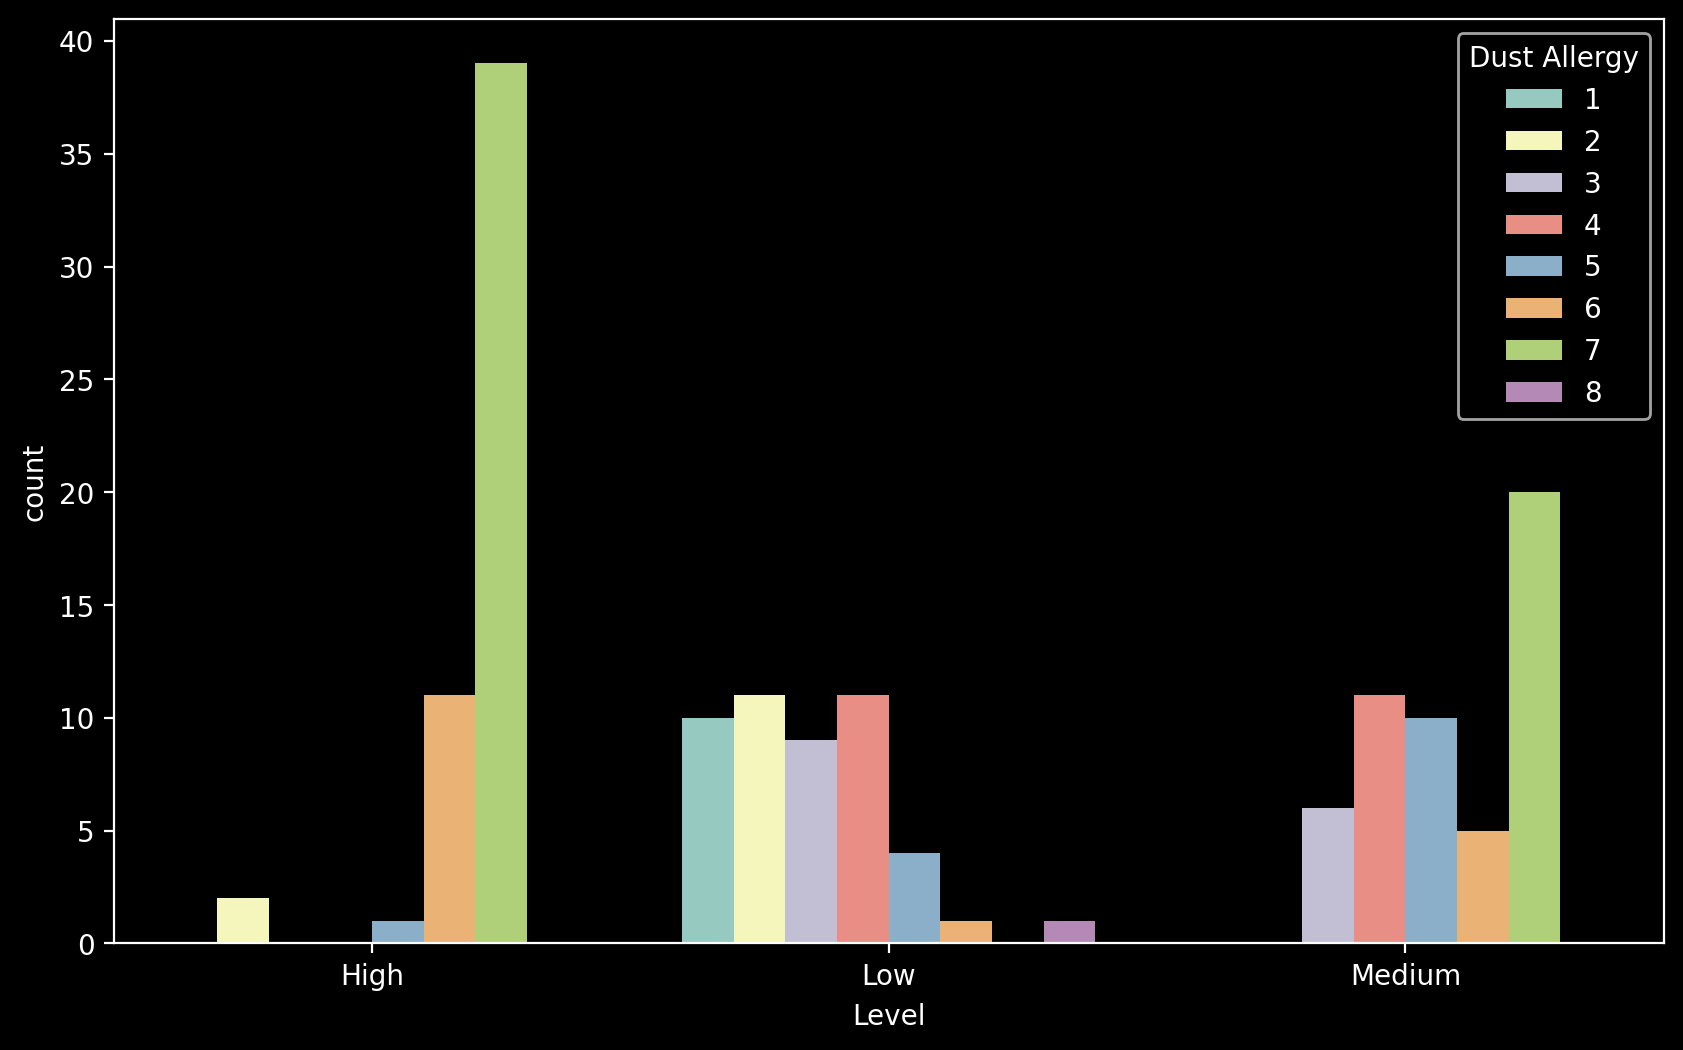

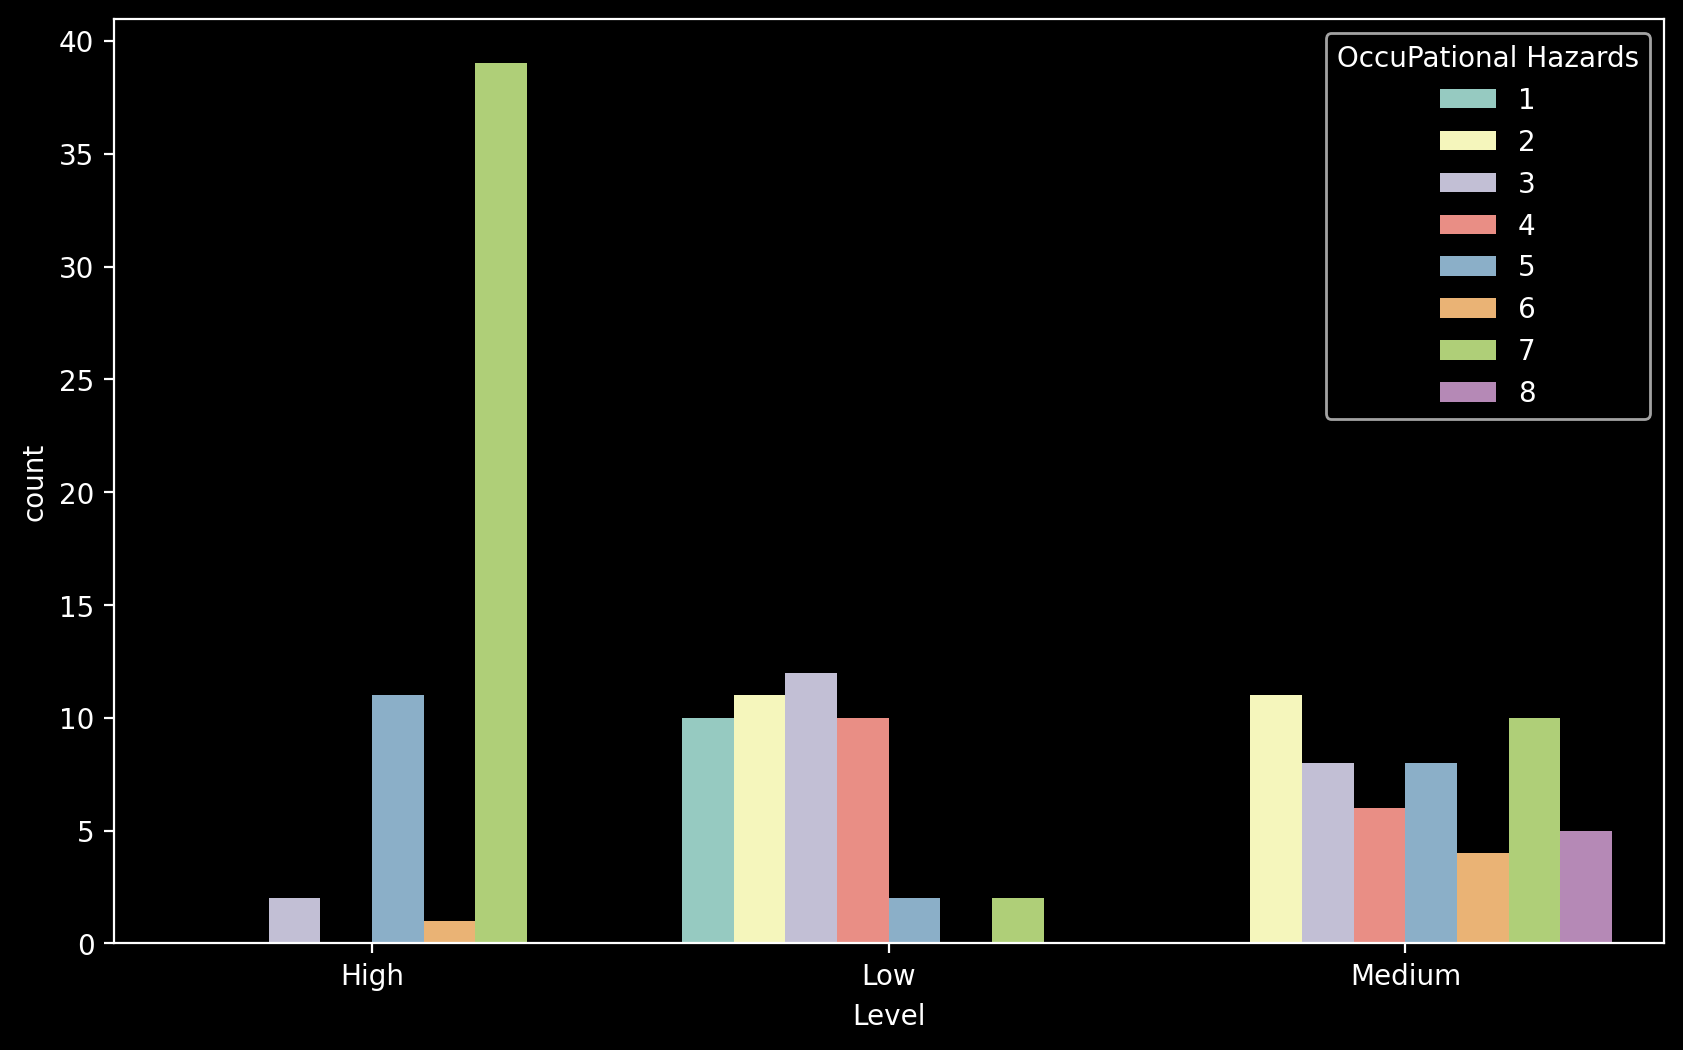

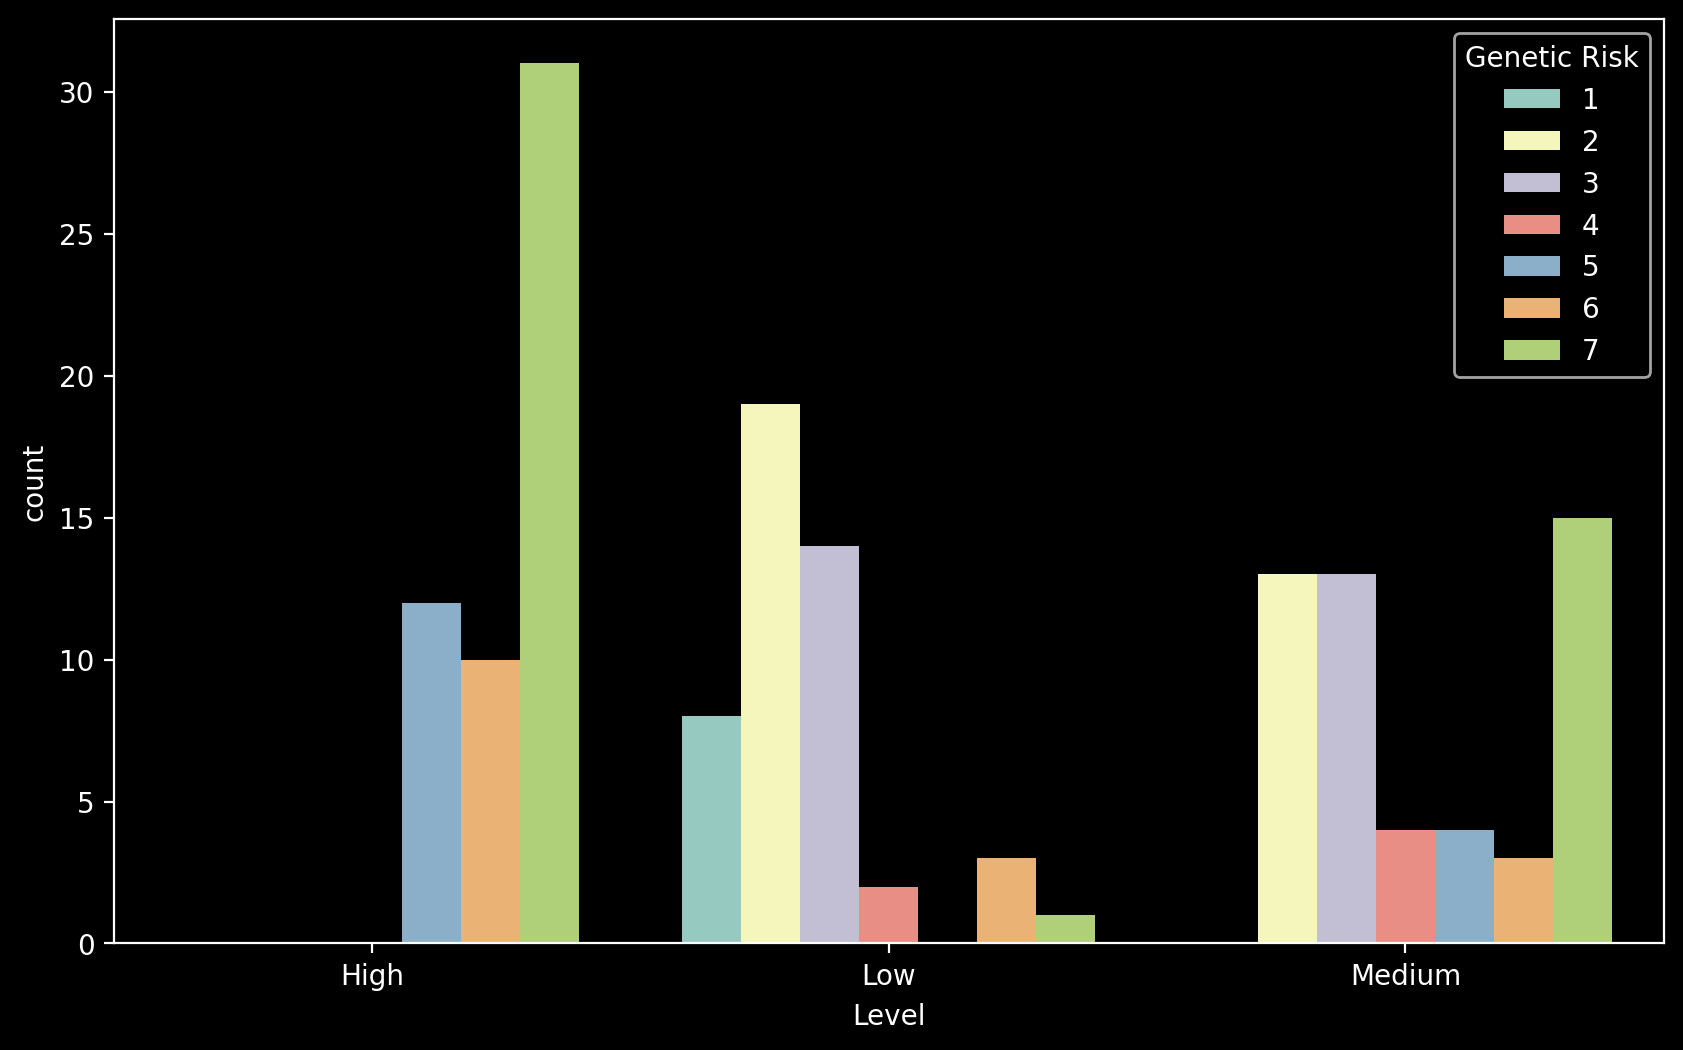

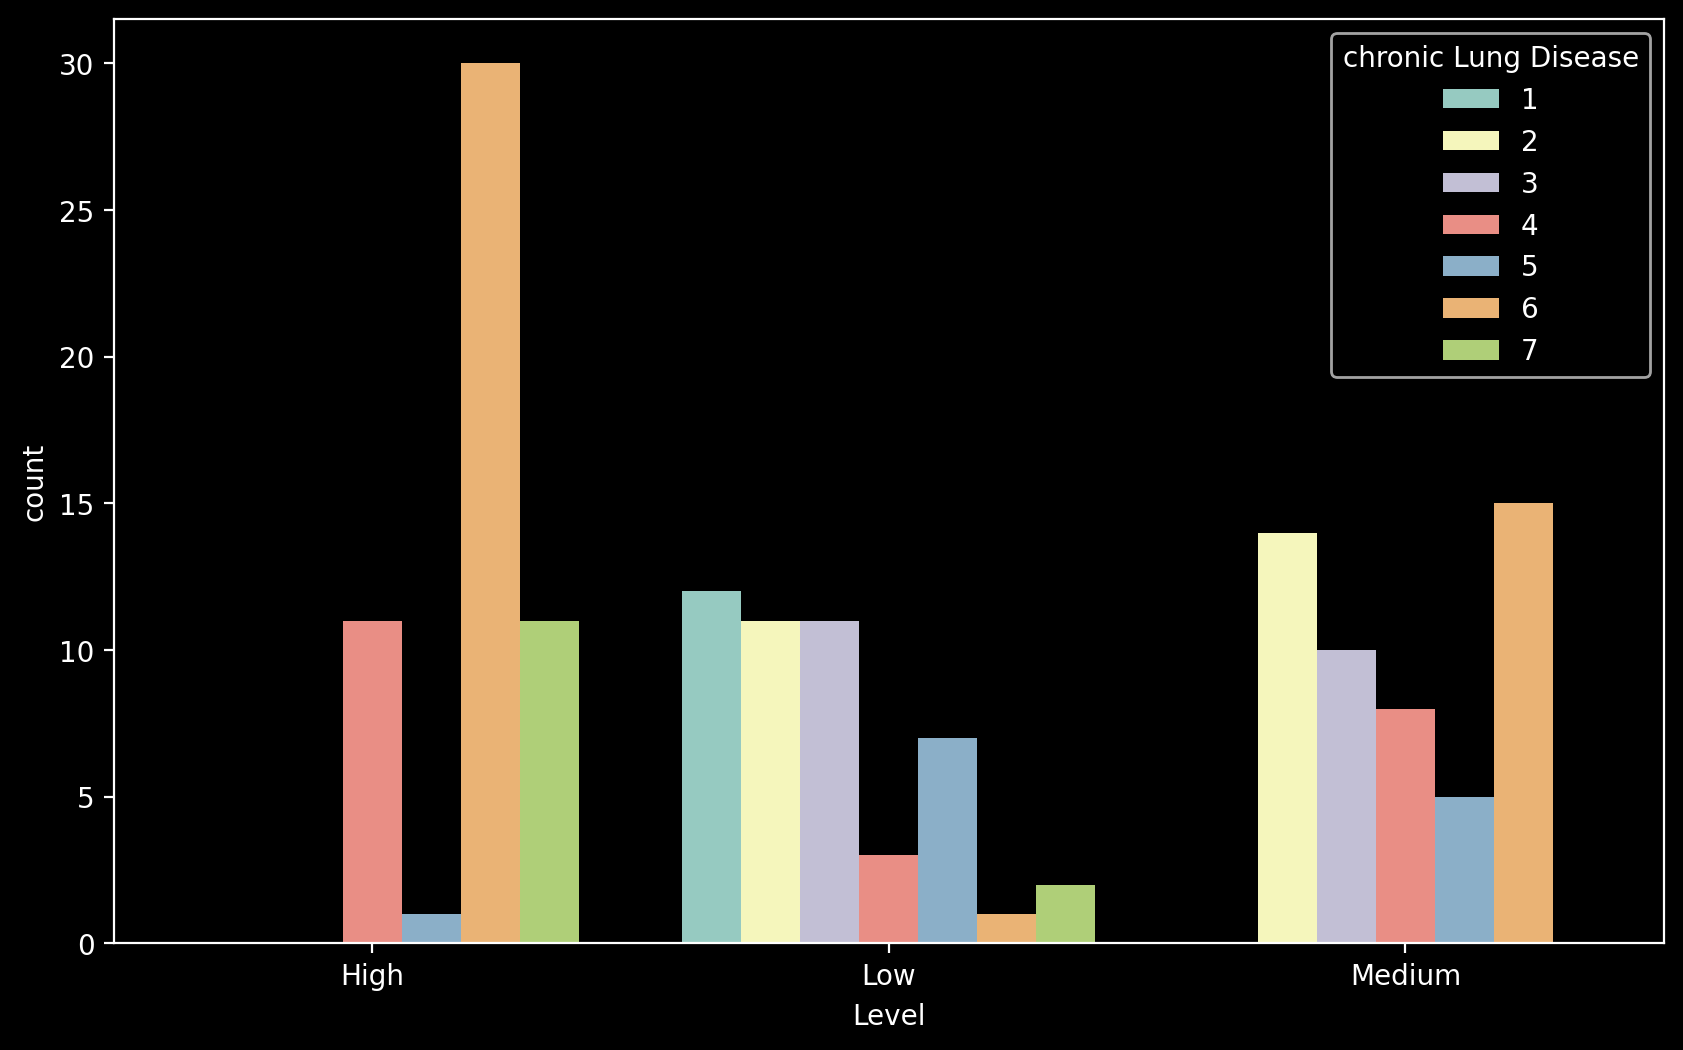

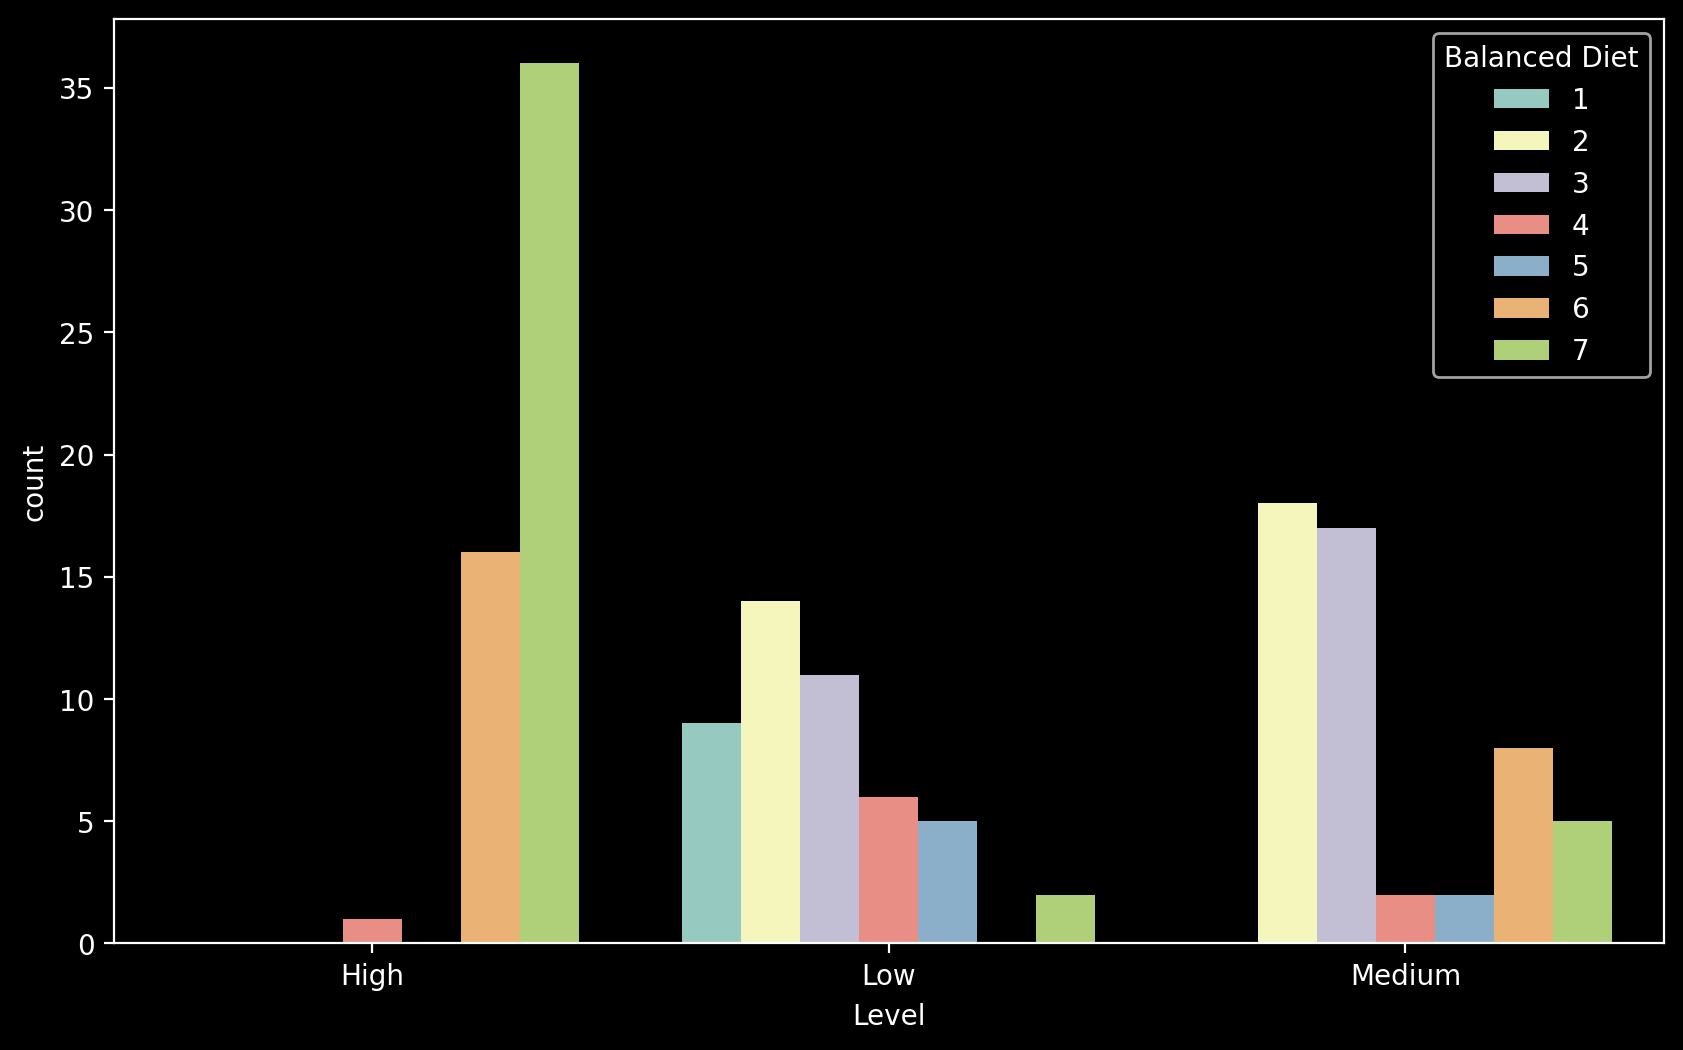

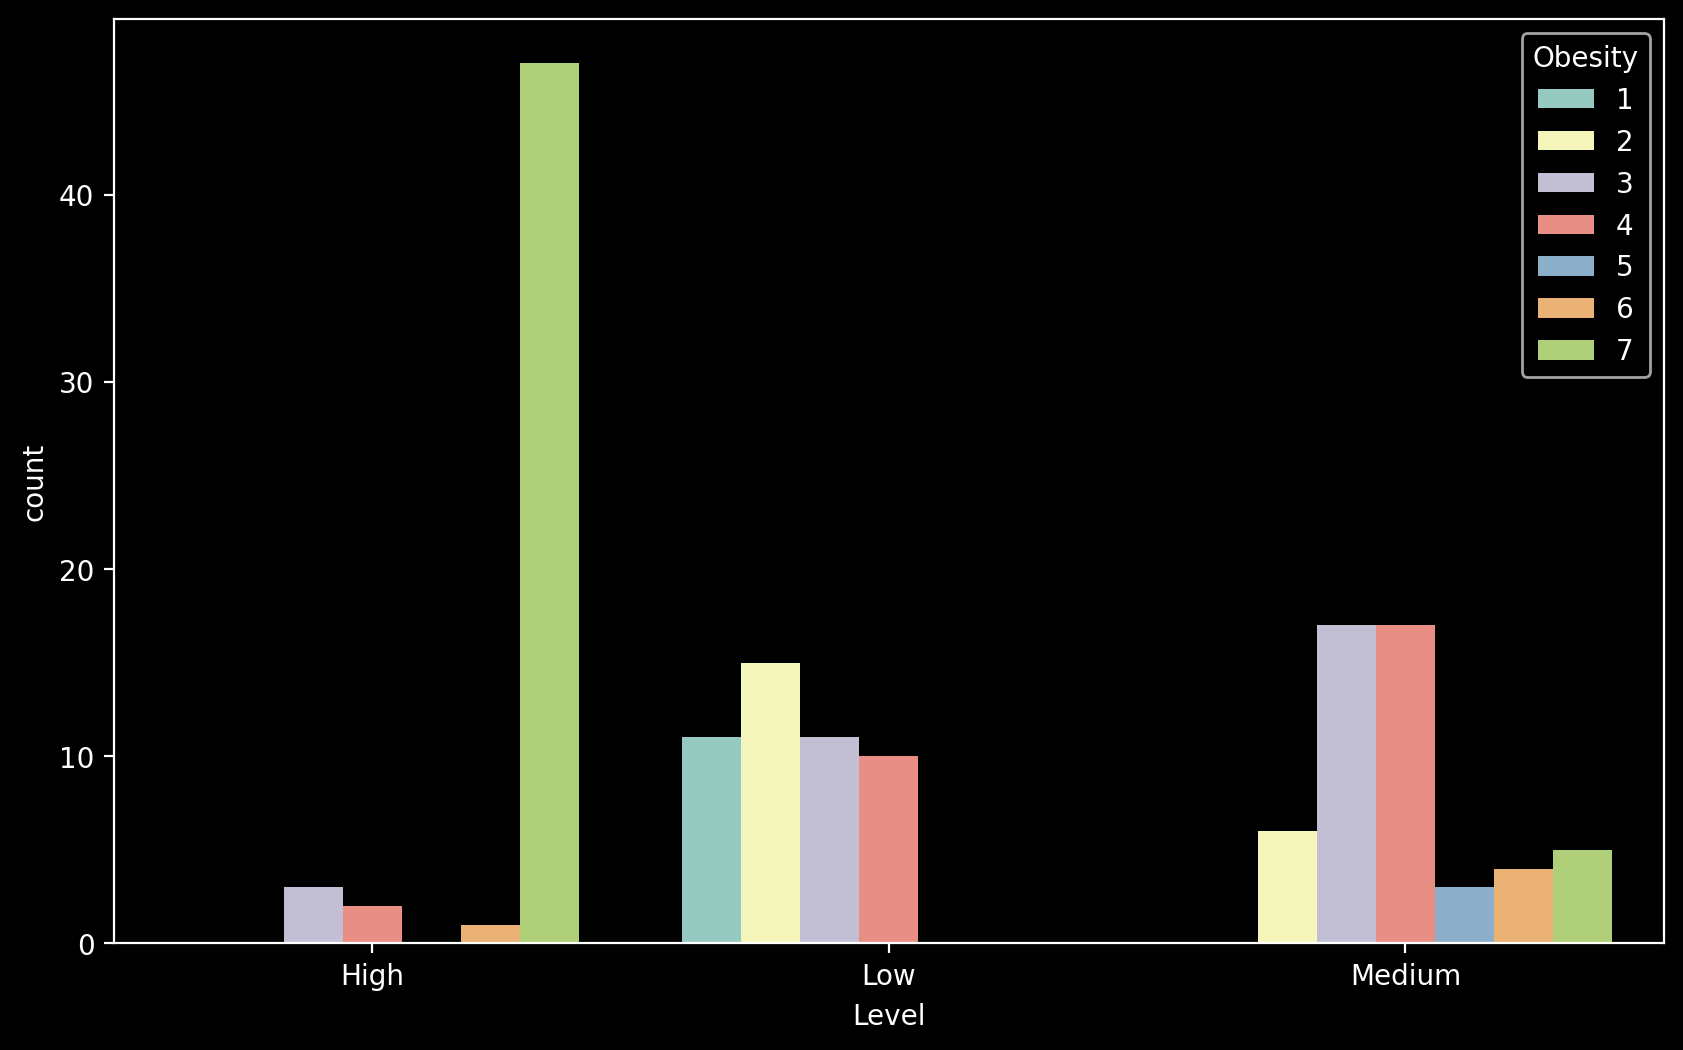

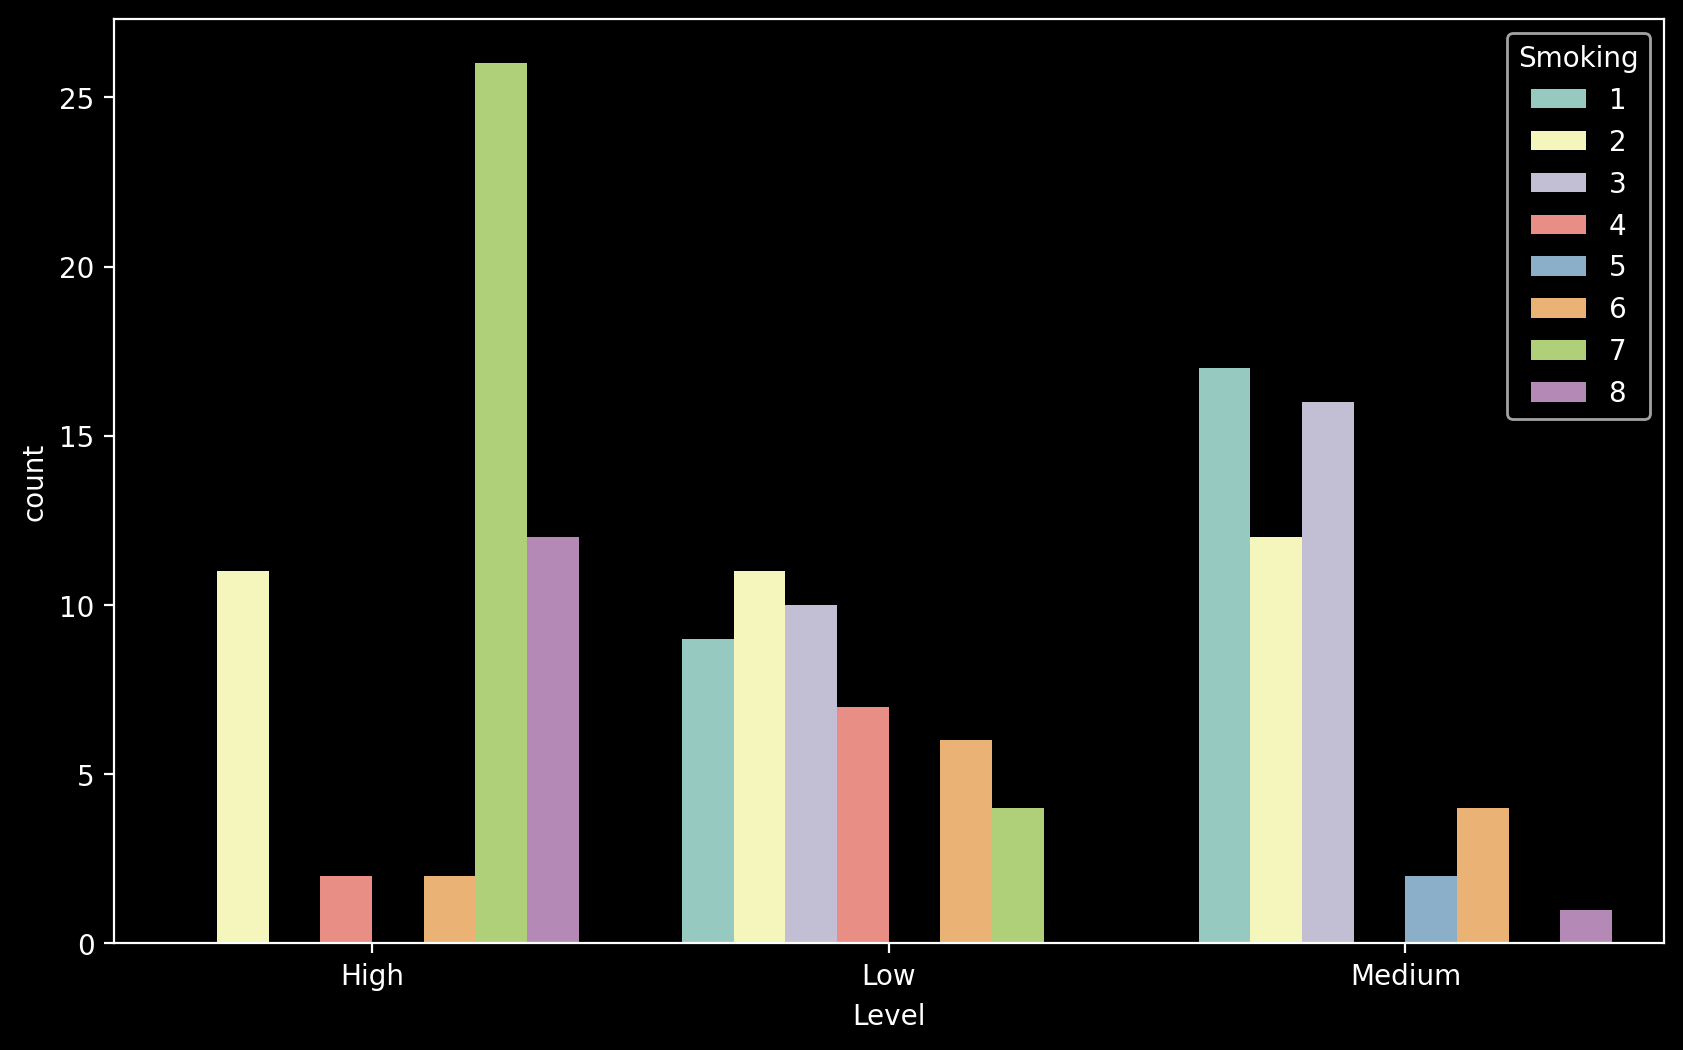

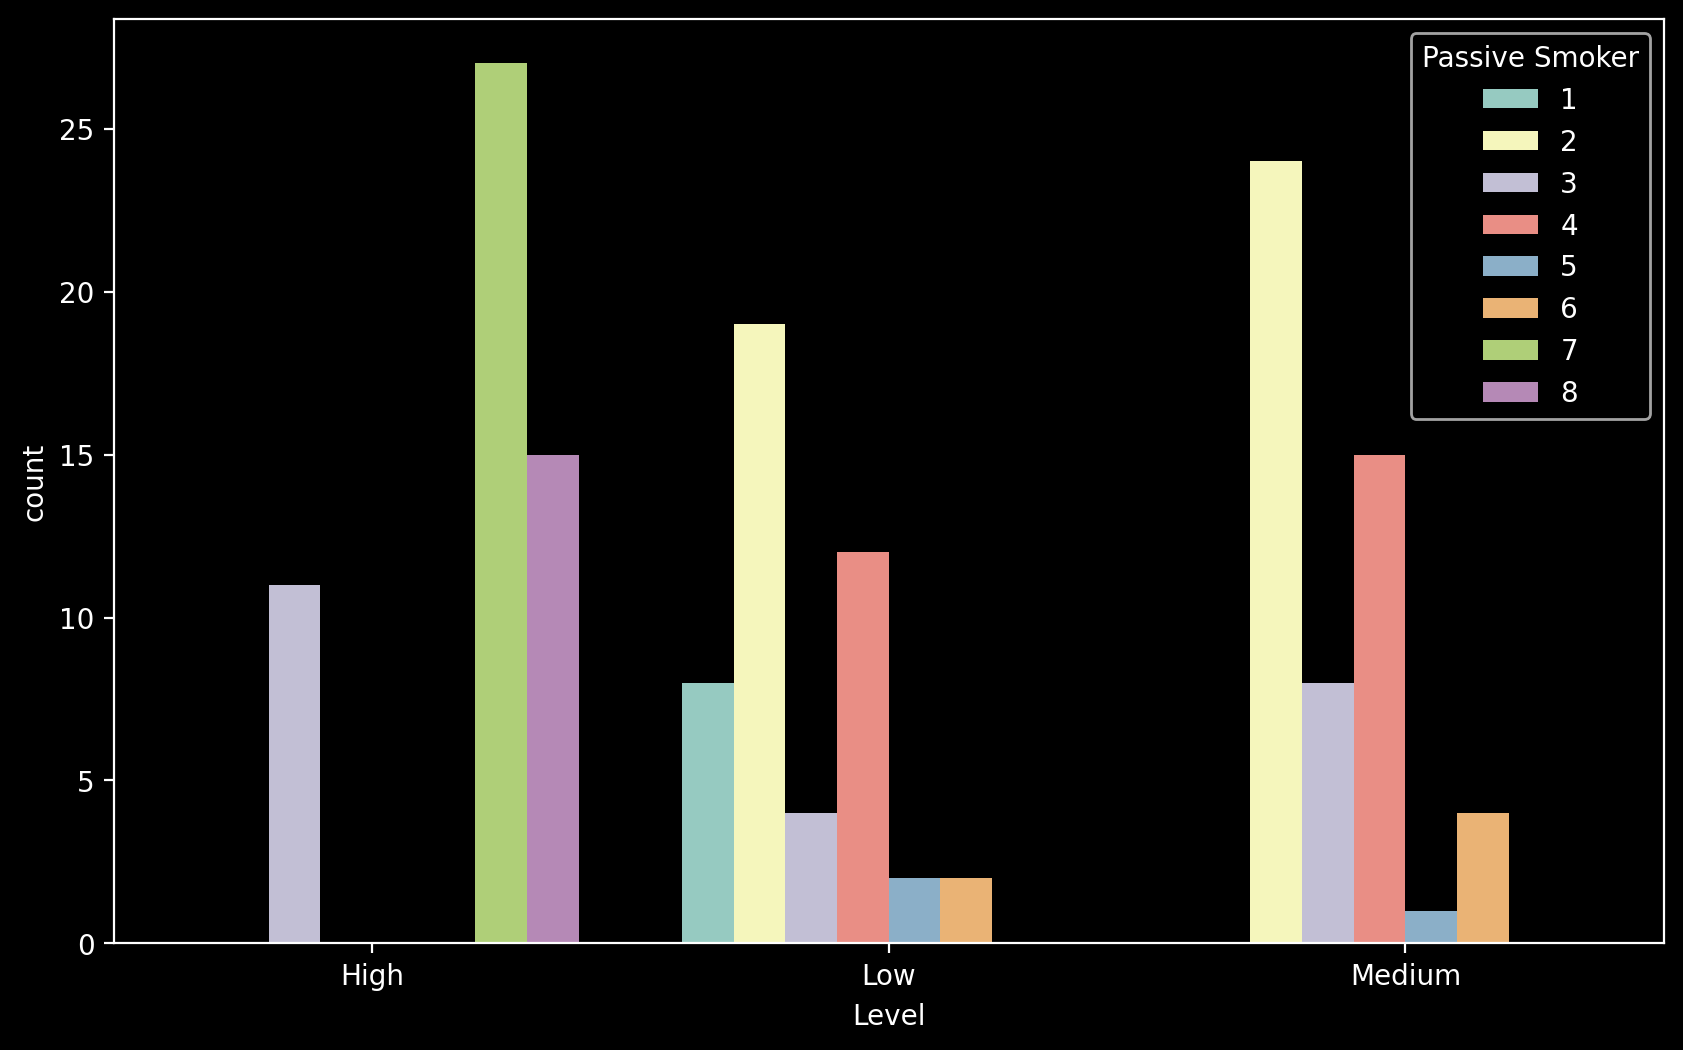

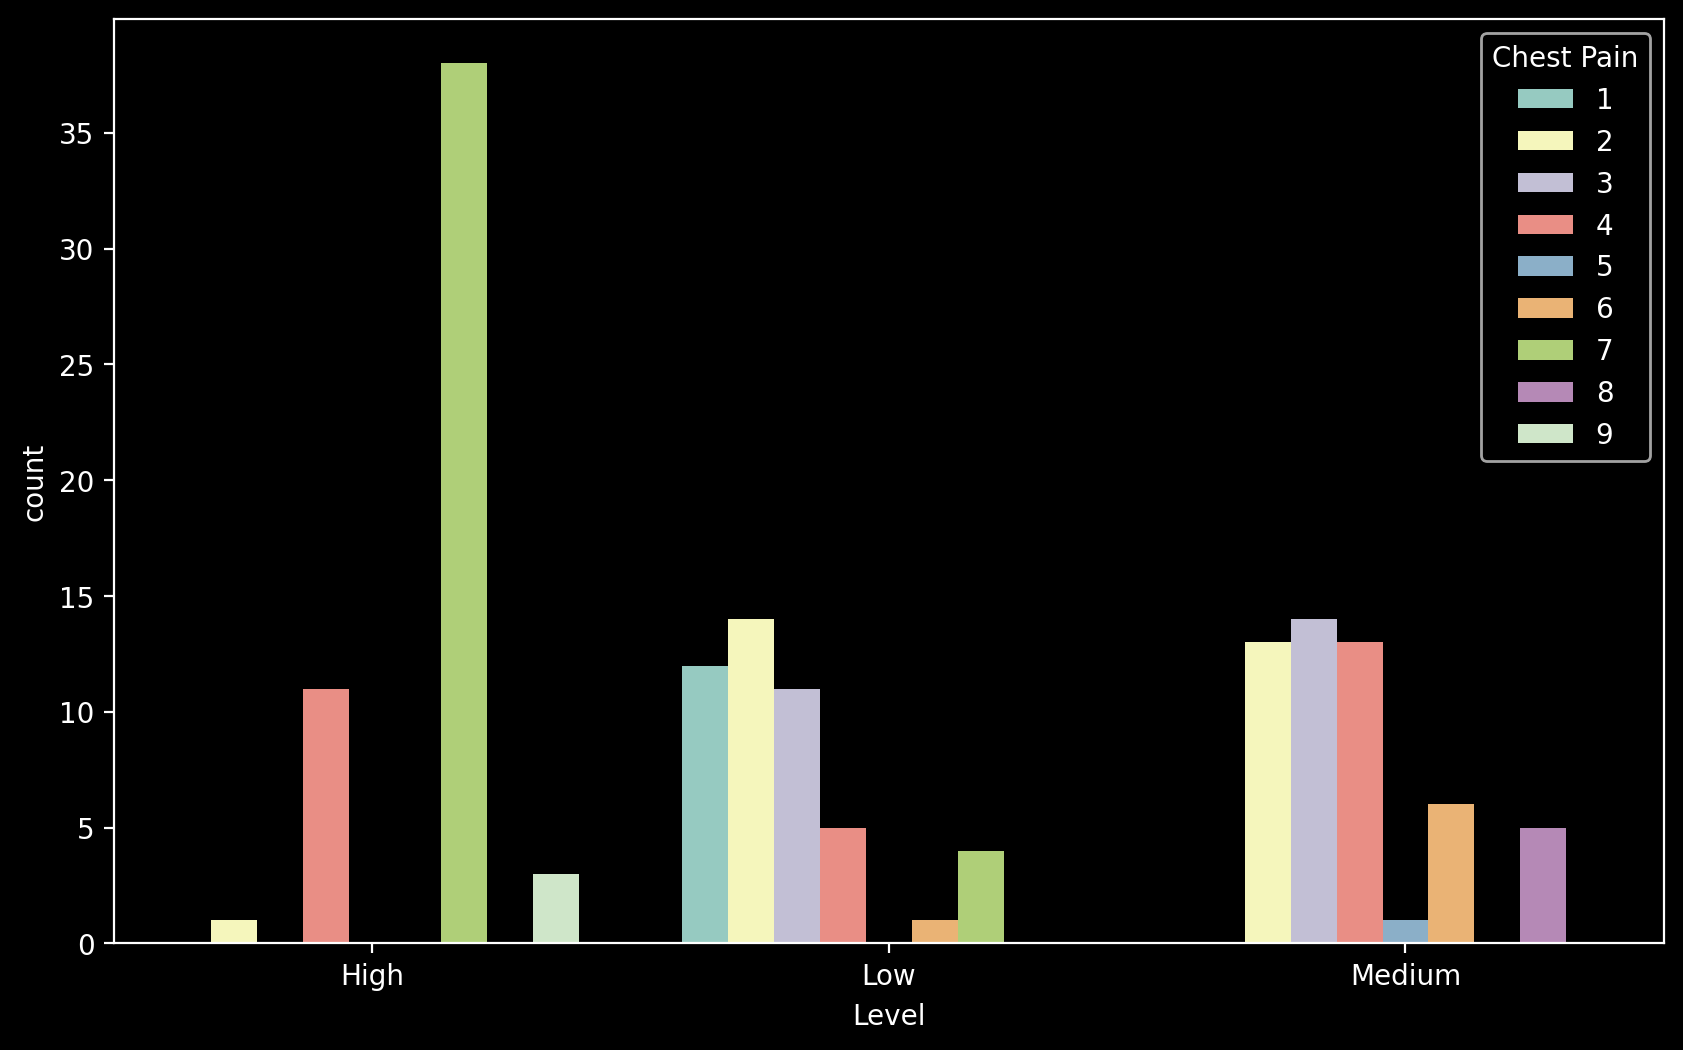

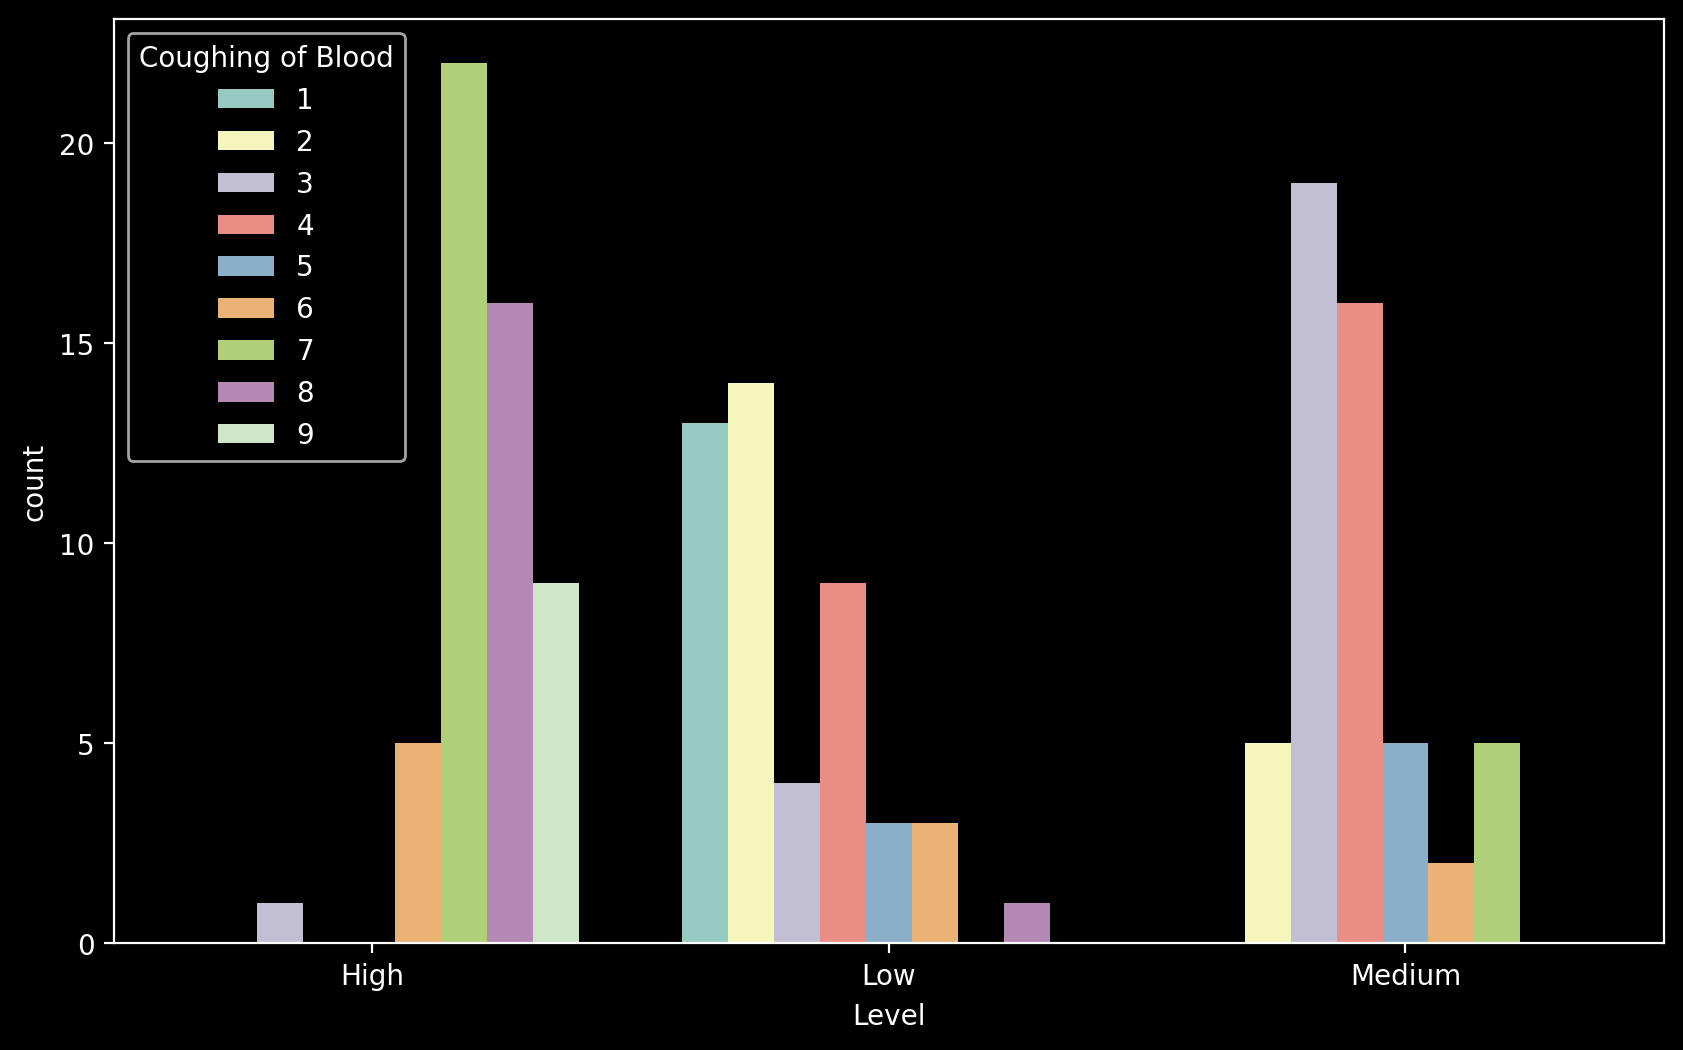

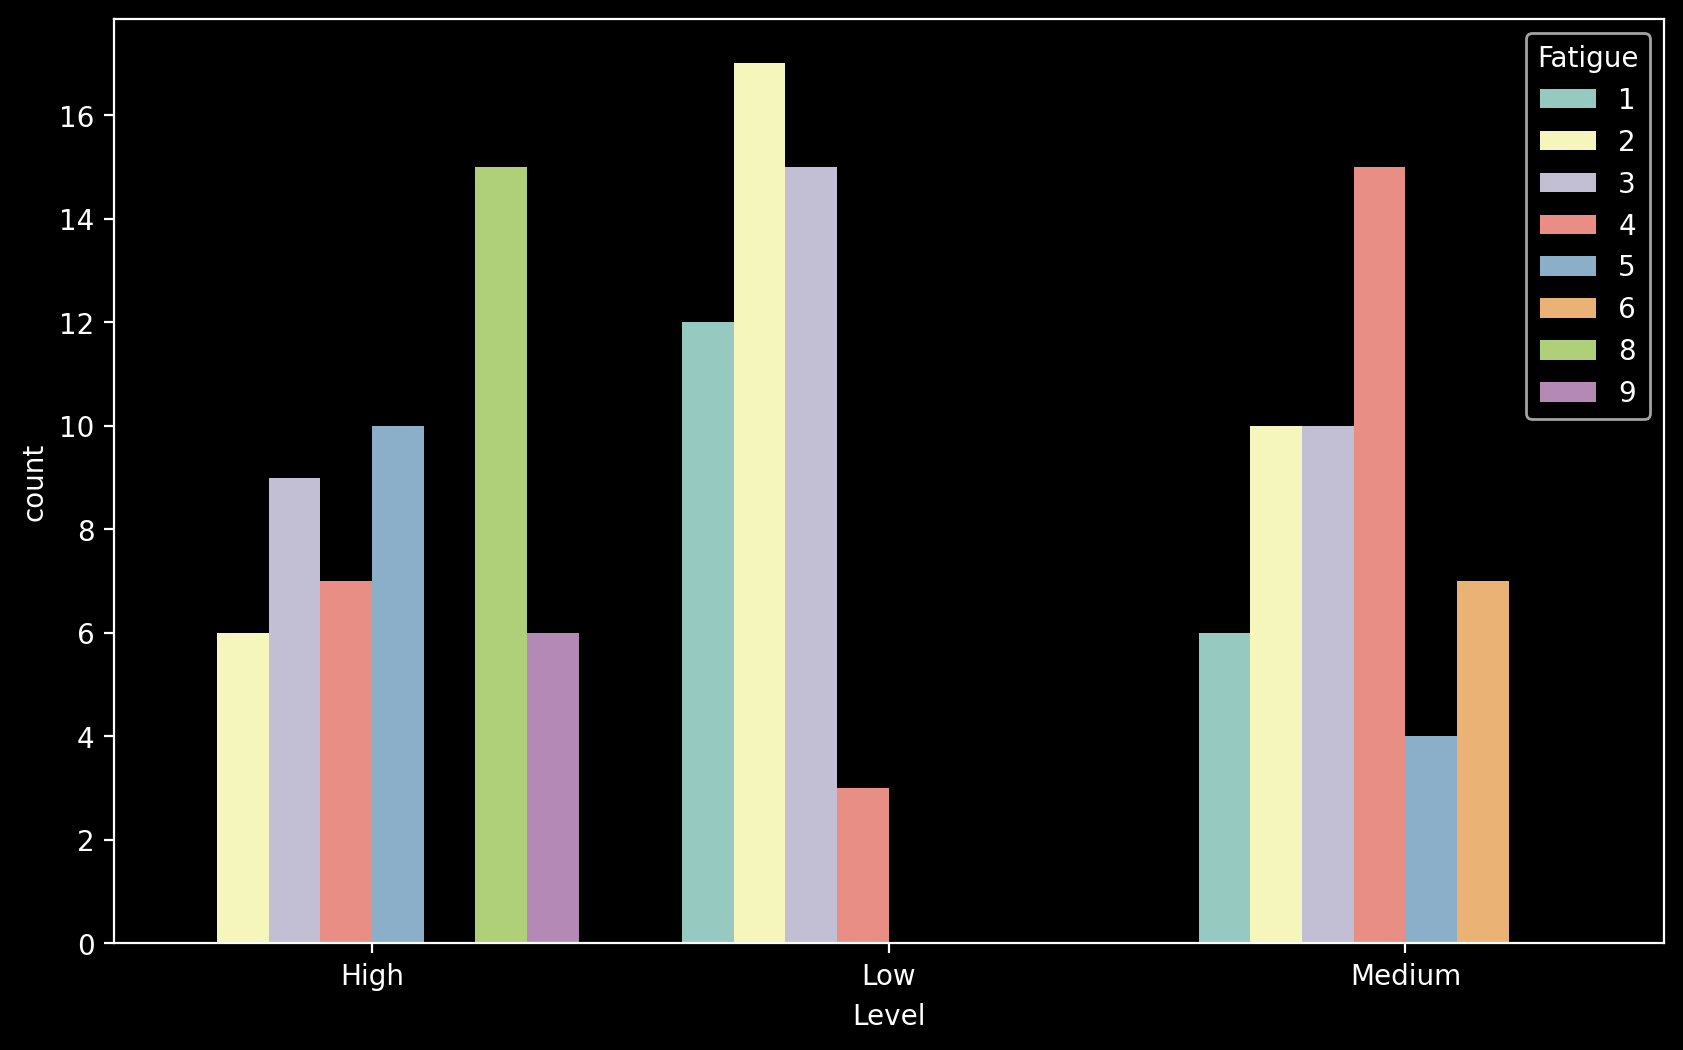

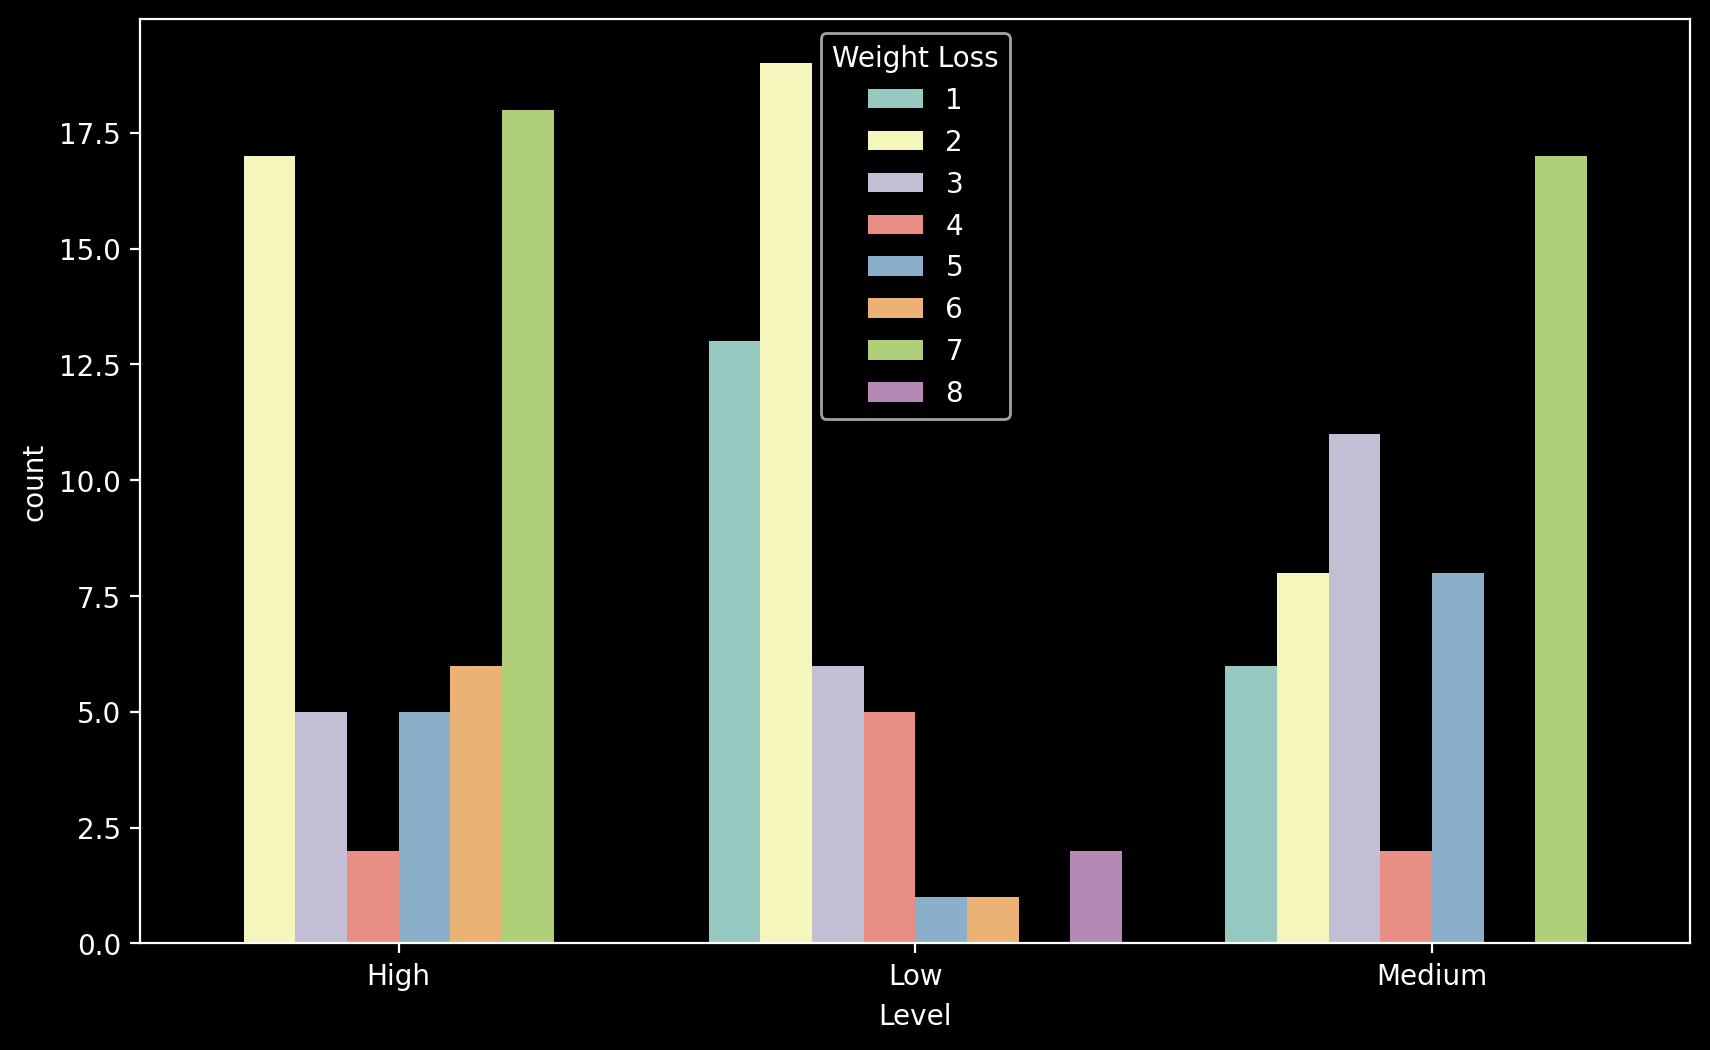

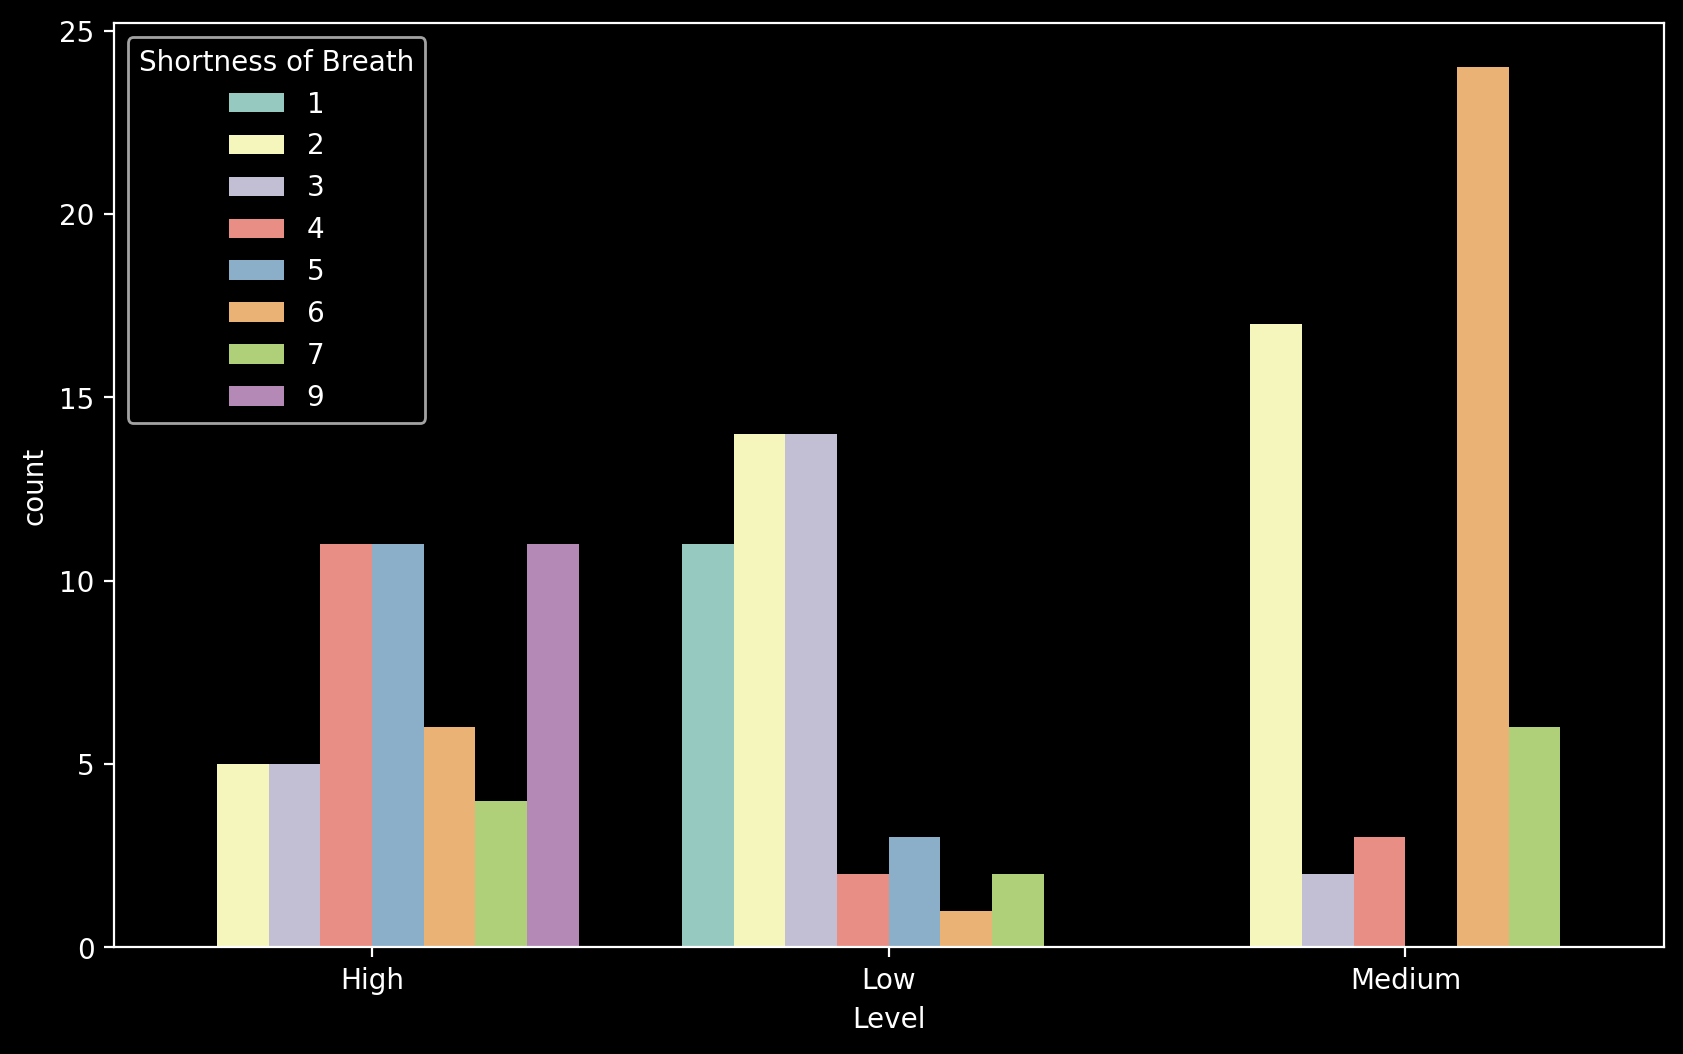

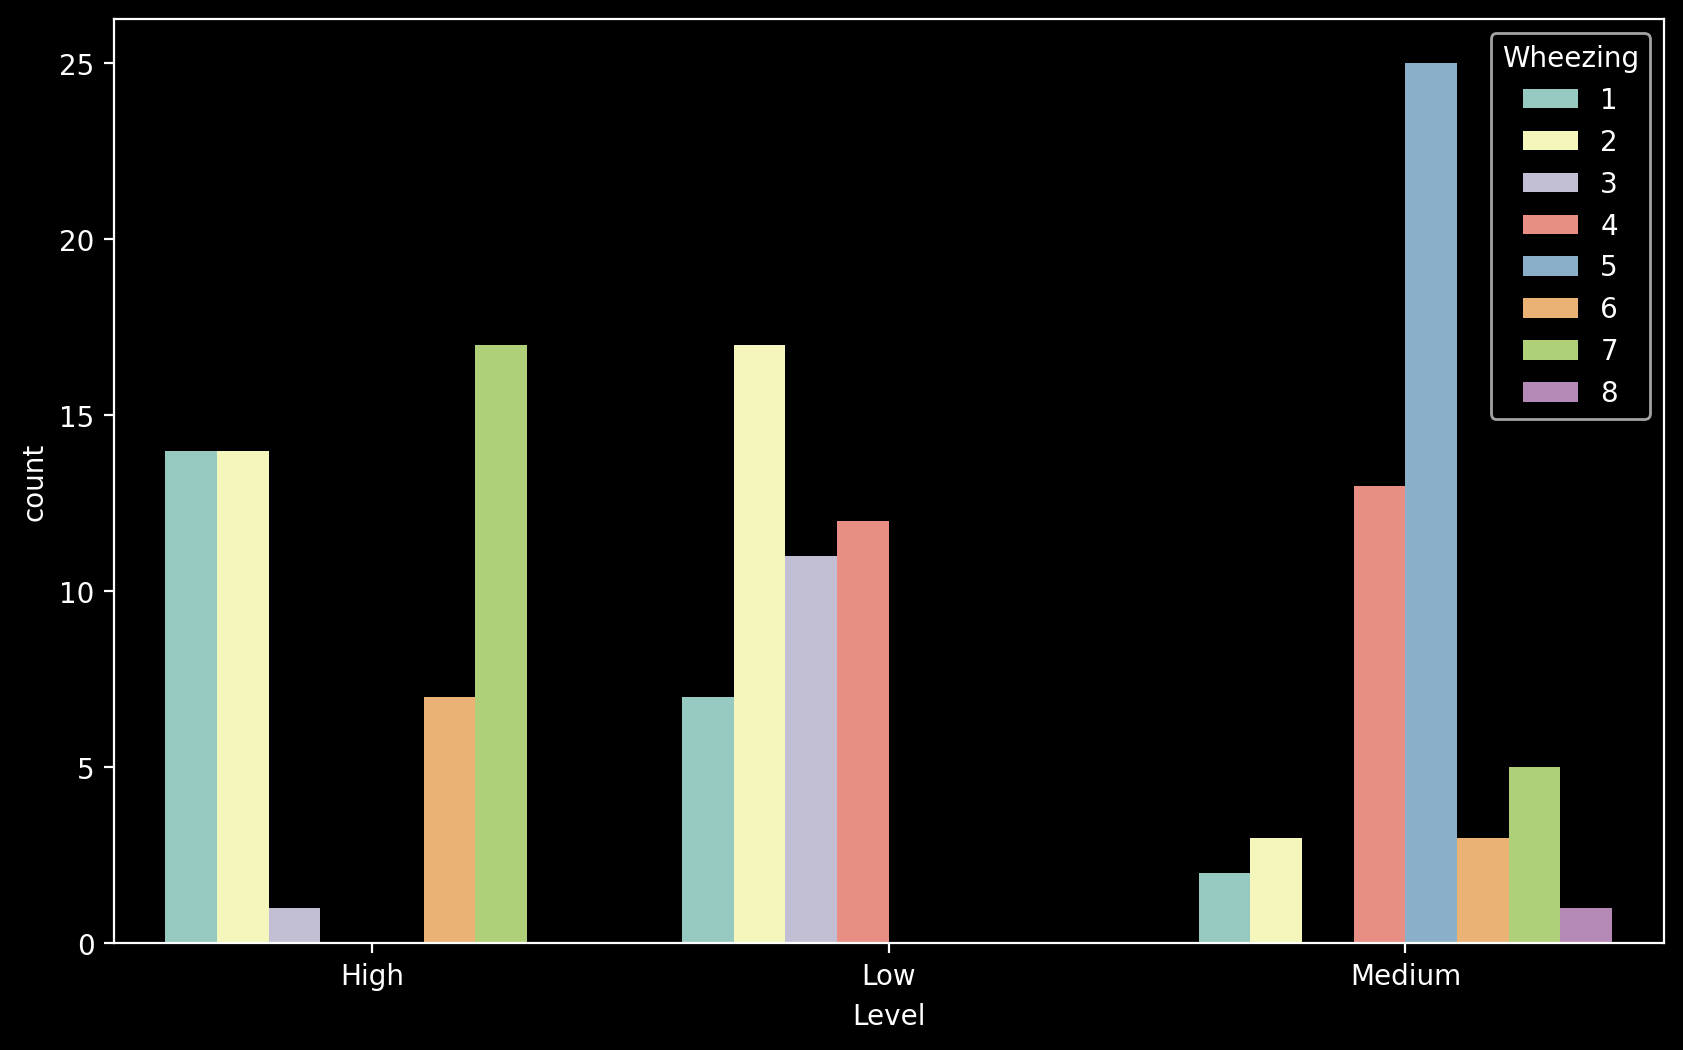

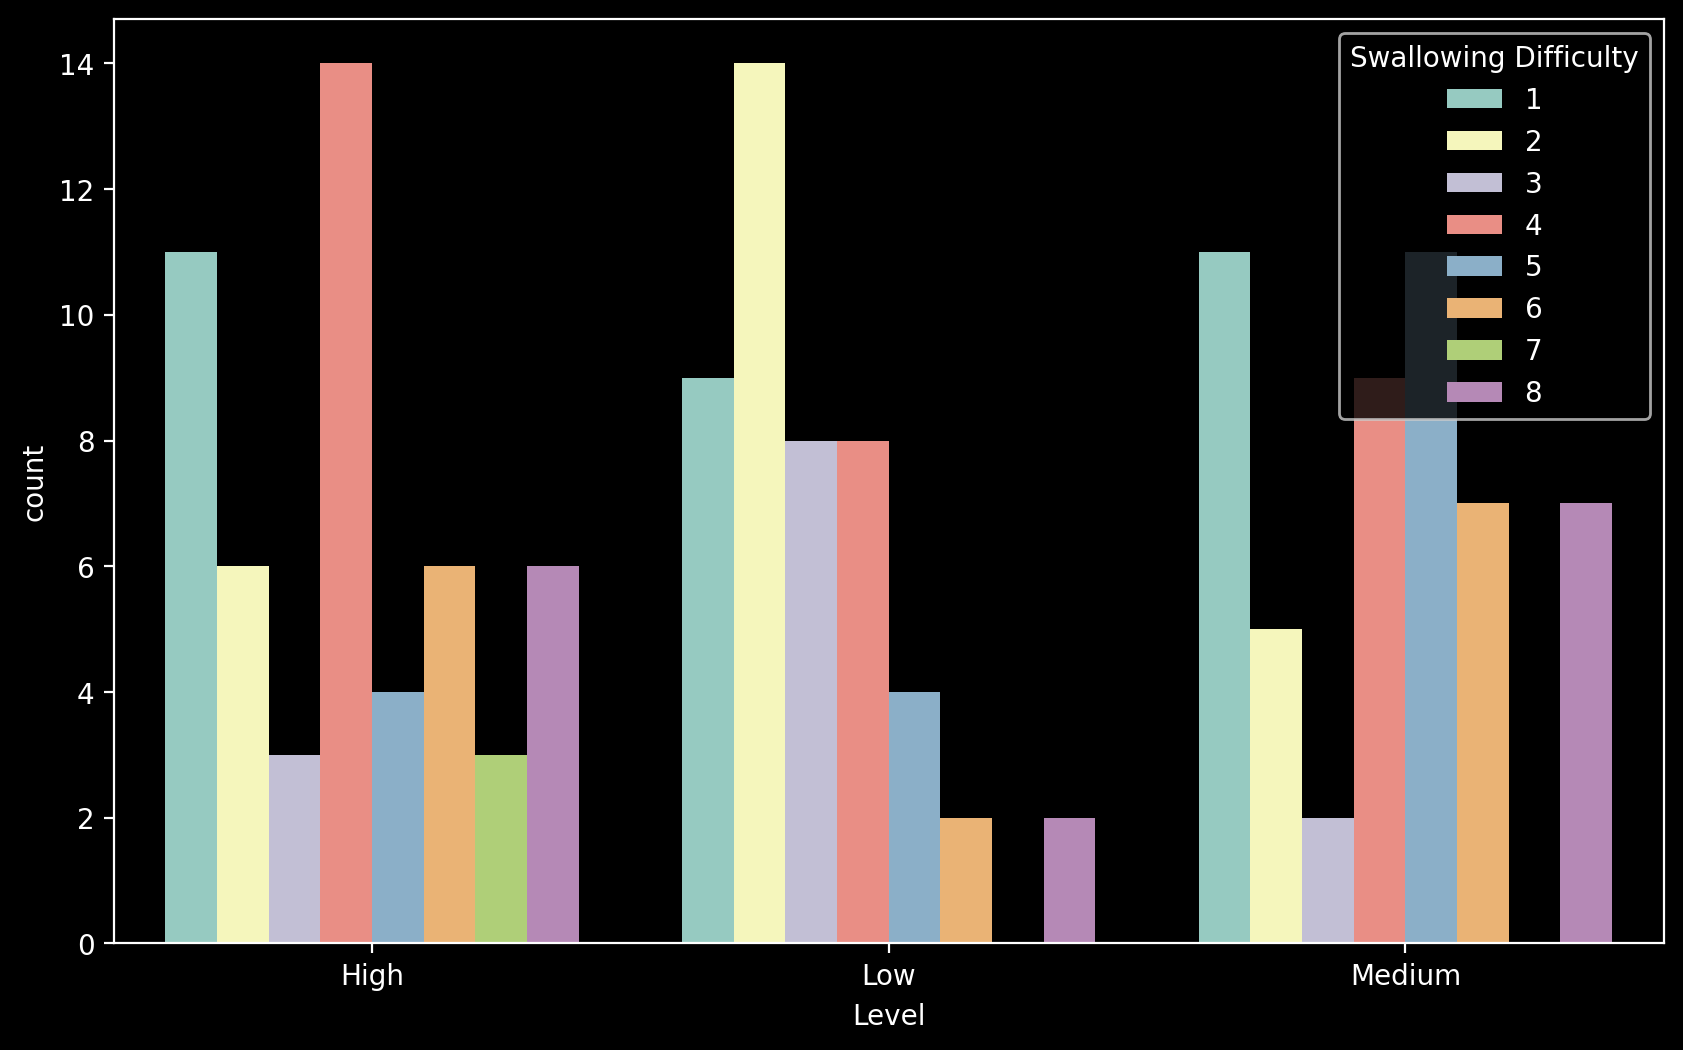

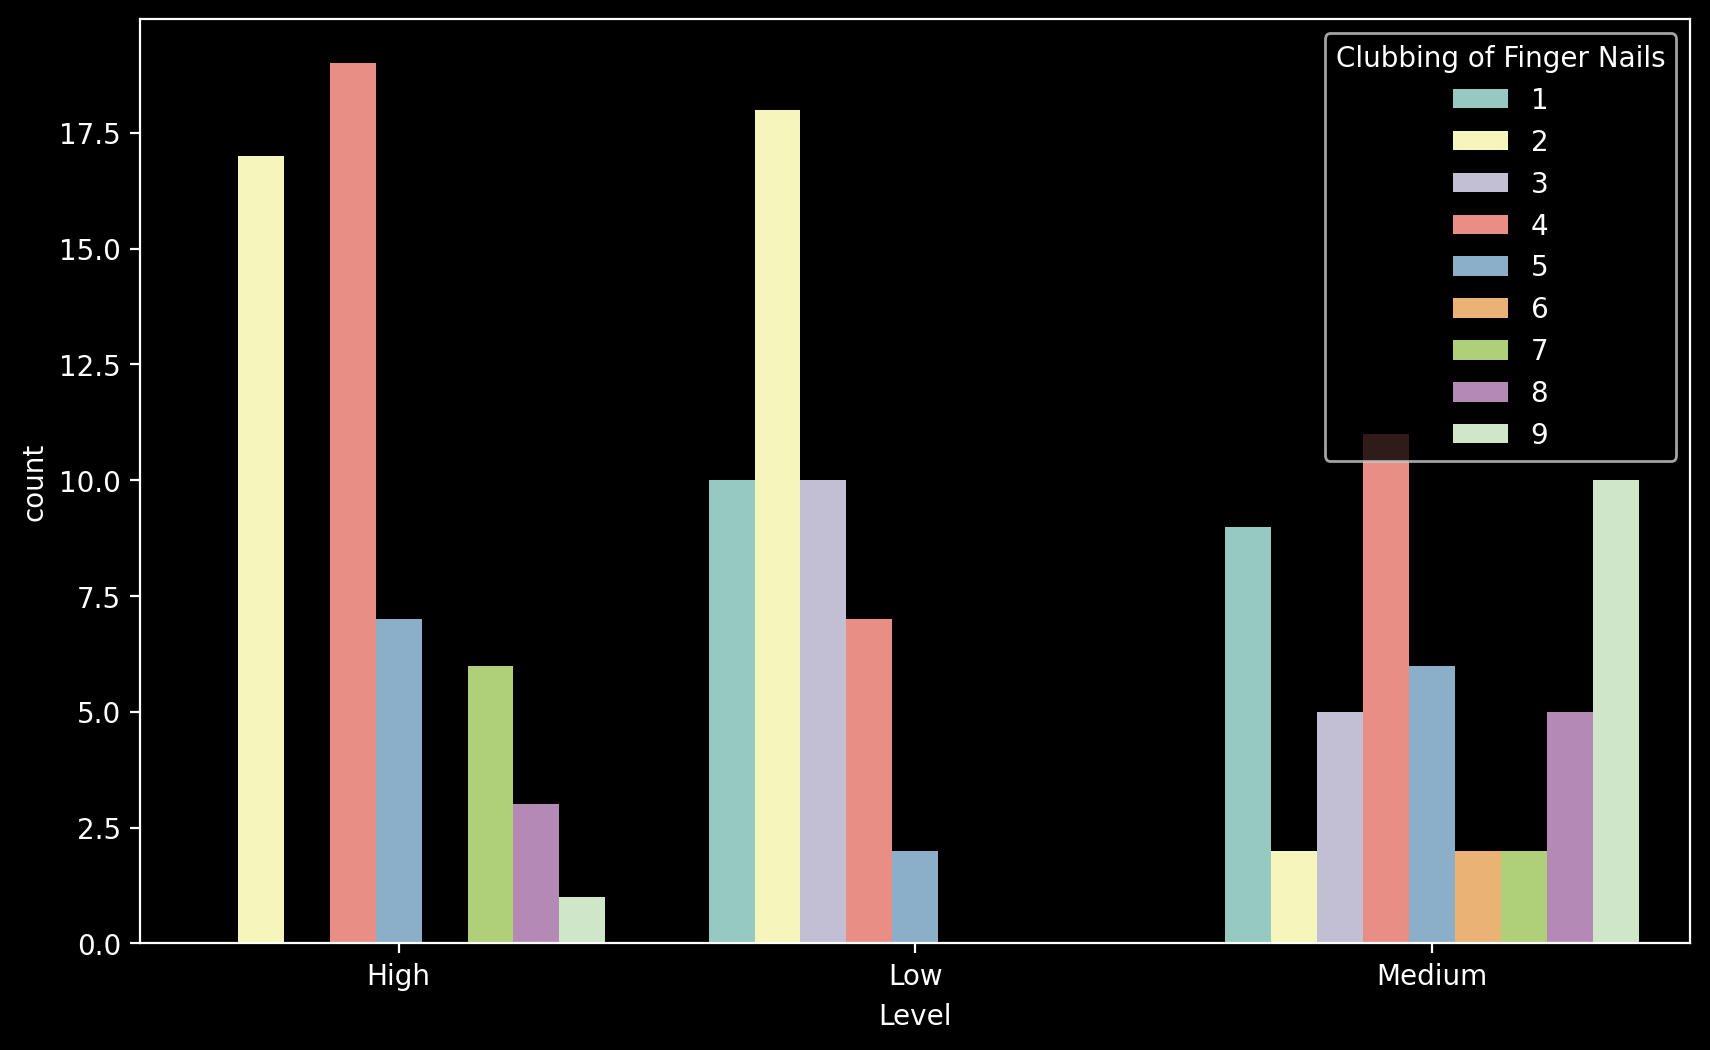

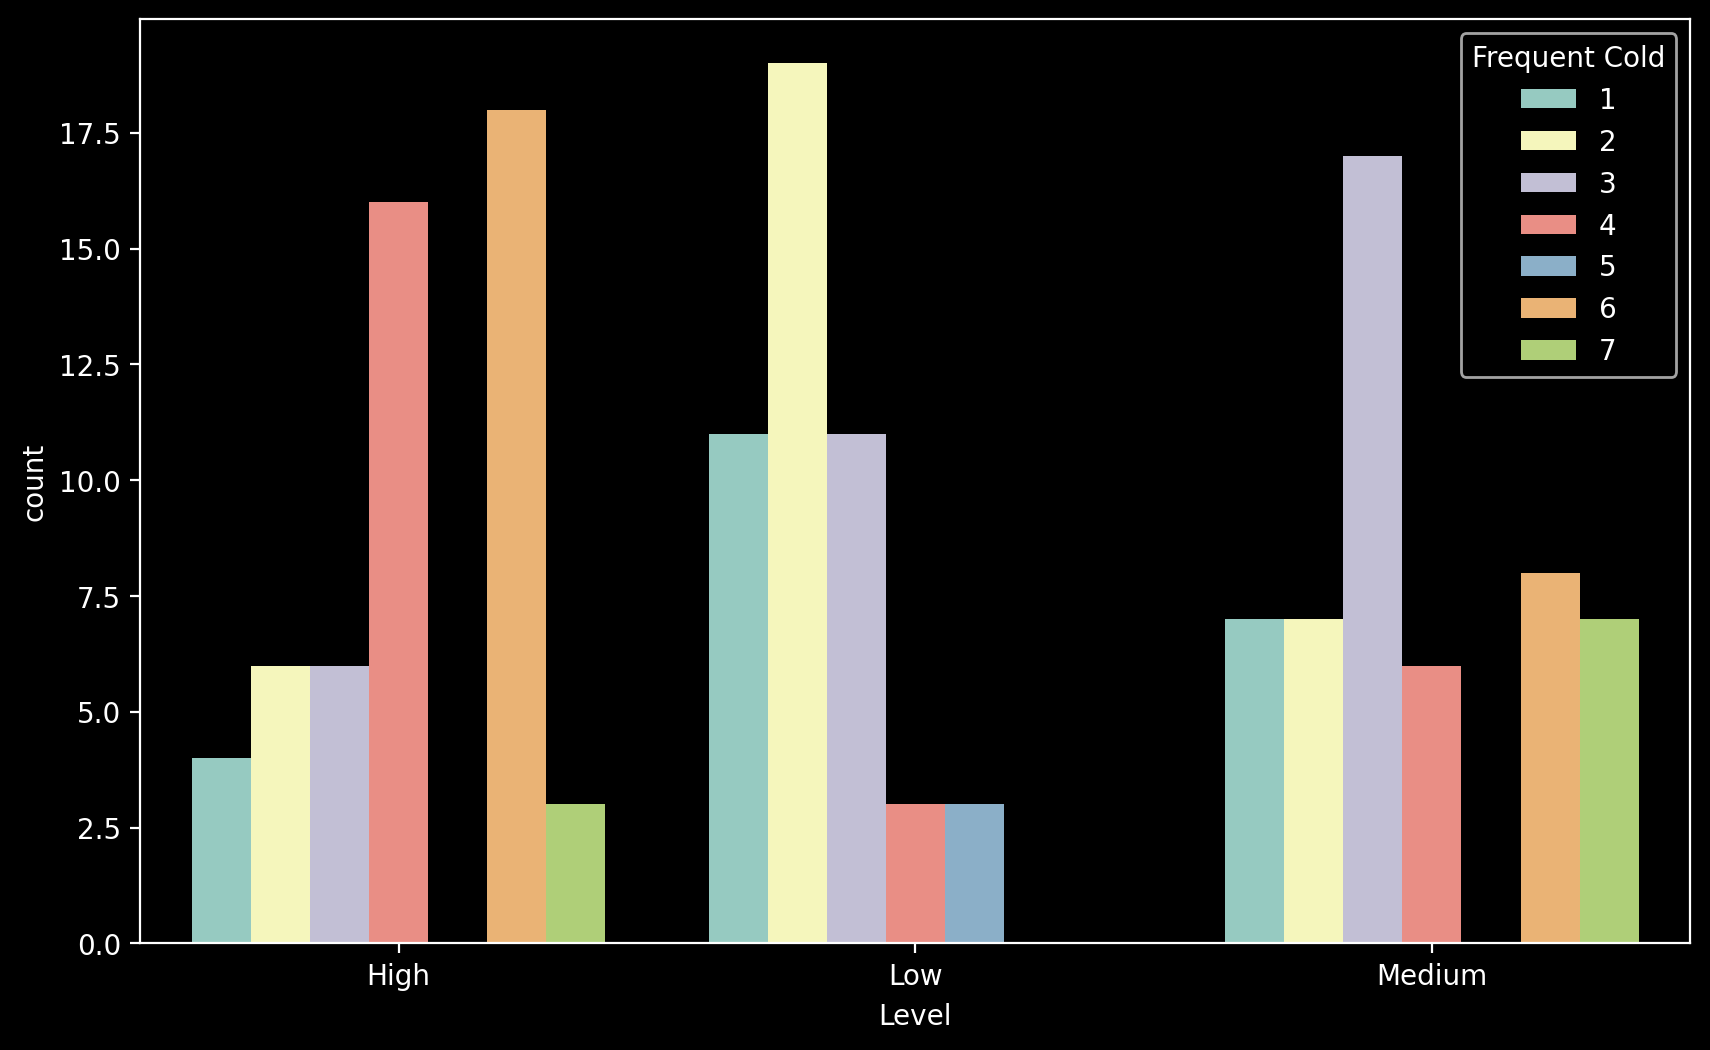

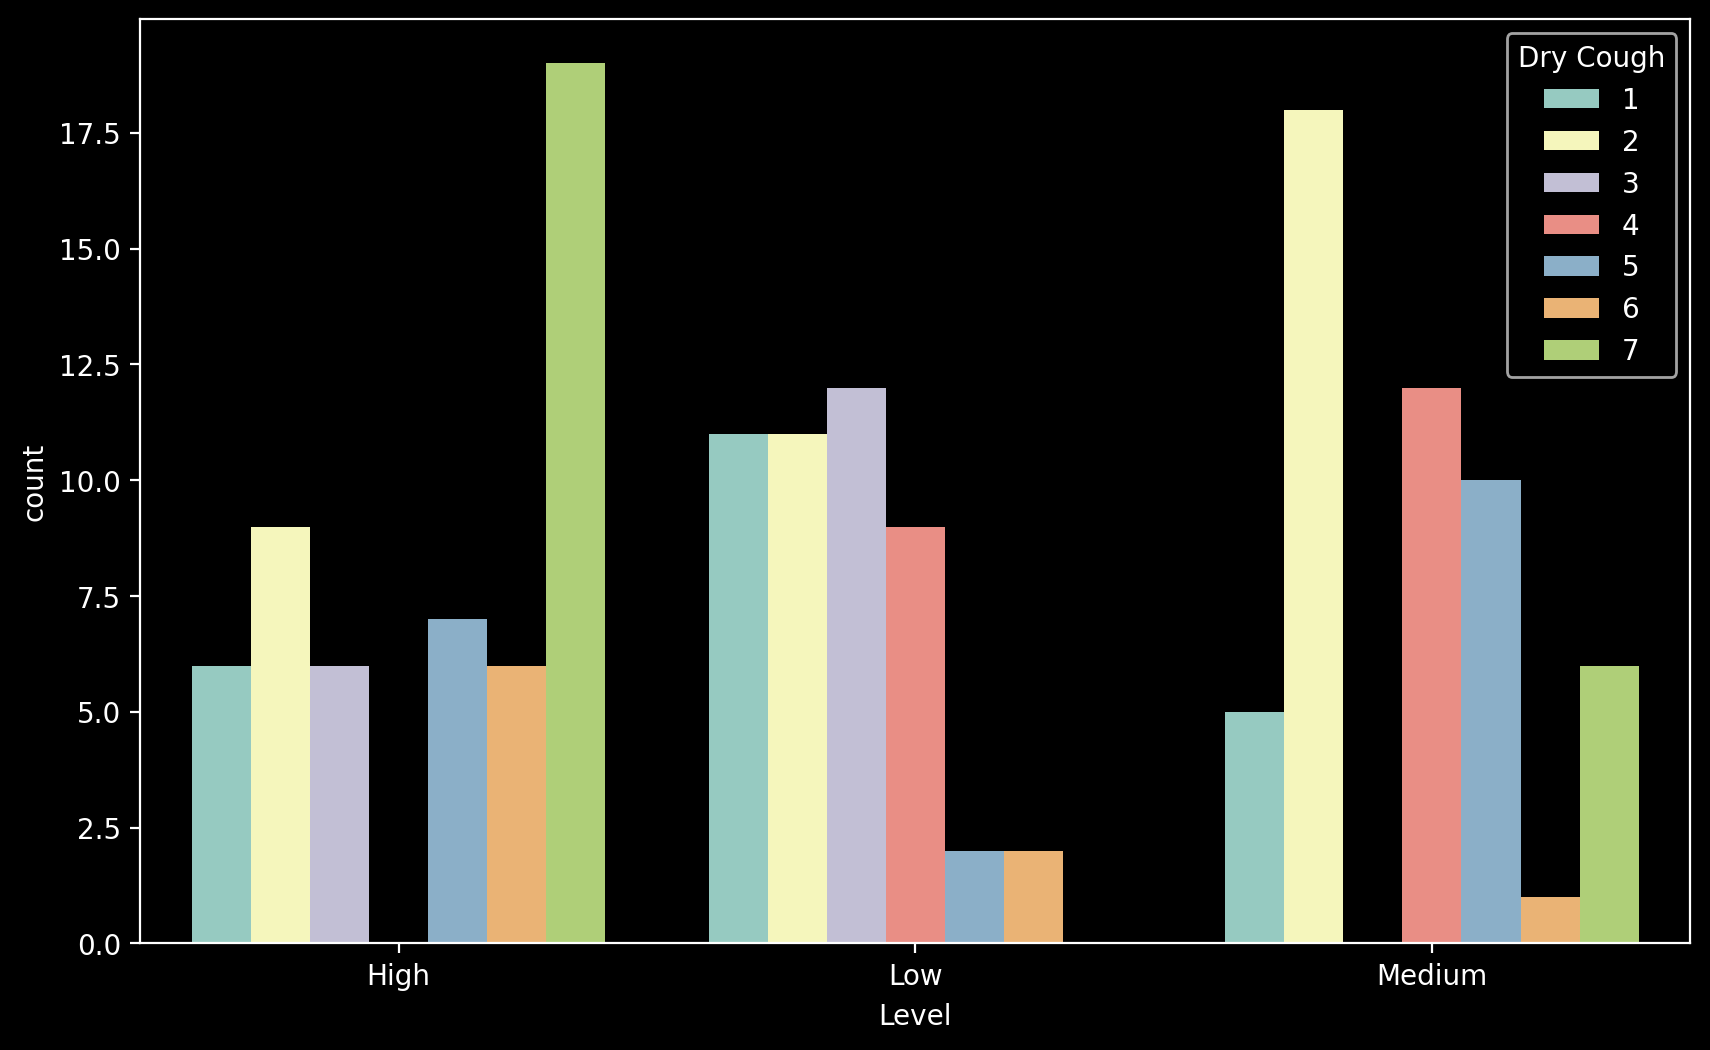

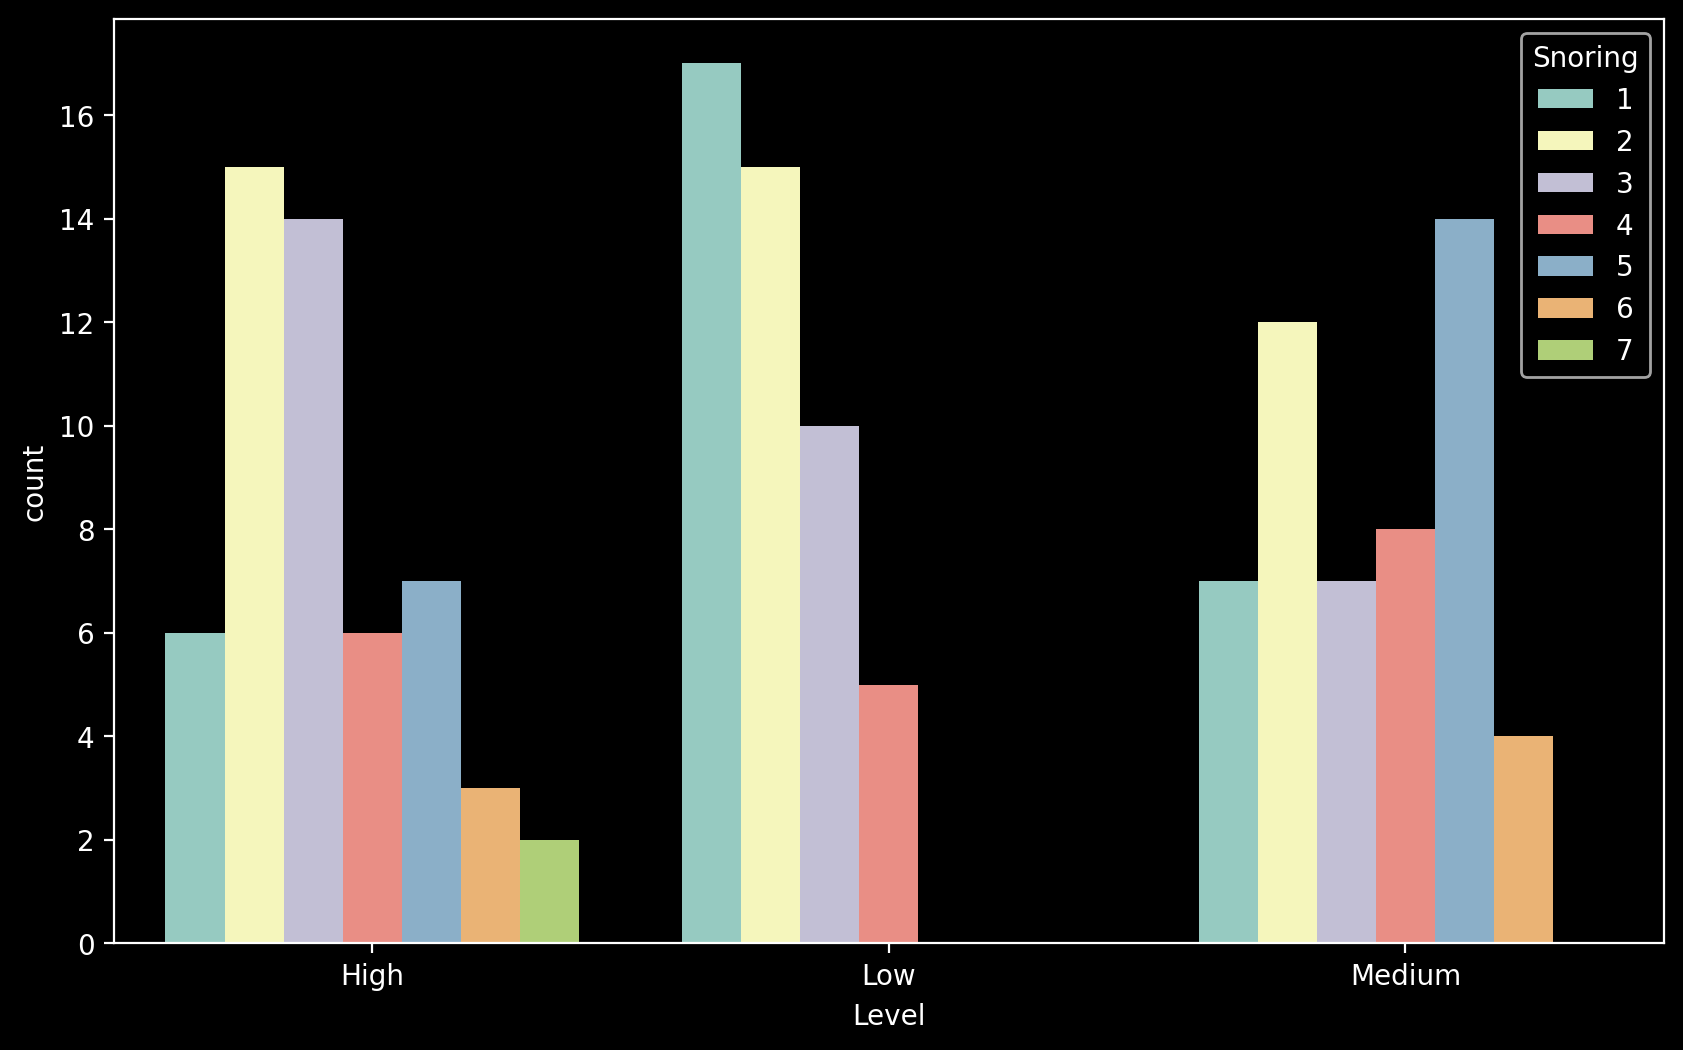

In [15]:
#diplay Level count with all columns
for i in df.columns:
    if not i == 'Level':
        plt.figure(figsize=(10,6));
        sns.countplot(data=df,x='Level',hue=i);

In [16]:
#Categorical Naive bayes class
class CNaiveBayes:
    def __init__(self):
        # Store the probabilities of each class
        self.class_priors = {}
        # Store the probabilities of feature values given a class
        self.feature_likelihoods = {}
        # List of all possible classes
        self.classes = None

    def fit(self, X, y):
        # Identify the unique classes
        self.classes = np.unique(y)
        # Number of samples and features
        n_samples, n_features = X.shape
        
        # Initialize the dictionaries to store probabilities
        self.class_priors = {c: 0 for c in self.classes}
        self.feature_likelihoods = {c: {} for c in self.classes}
        
        for c in self.classes:
            # Get all samples where the class is 'c'
            X_c = X[y == c]
            # Calculate the prior probability of class 'c' P(Class)
            self.class_priors[c] = X_c.shape[0] / n_samples
            
            for i in range(n_features):
                # Get all unique values of feature i
                feature_values = np.unique(X[:, i])
                # Initialize a dictionary to store P(Feature|Class)
                self.feature_likelihoods[c][i] = {}
                
                for value in feature_values:
                    # Calculate the likelihood of value given class 'c' P(Feature|Class)
                    likelihood = np.sum(X_c[:, i] == value) / X_c.shape[0]
                    self.feature_likelihoods[c][i][value] = likelihood

    def predict(self, X):
        predictions = []
        for x in X:
            # Store the log of the probabilities for each class
            posteriors = {}
            for c in self.classes:
                # Start with the prior probability of the class
                posteriors[c] = np.log(self.class_priors[c])
                
                # Multiply by the likelihood of each feature value
                for i, value in enumerate(x):
                    if value in self.feature_likelihoods[c][i]:
                        posteriors[c] += np.log(self.feature_likelihoods[c][i][value])
                    else:
                        posteriors[c] += np.log(1e-6)  # Small value to avoid zero
                
            # Choose the class with the highest probability
            predictions.append(max(posteriors, key=posteriors.get))
        
        return np.array(predictions)

In [17]:
#Training and testing split

In [18]:
x = df.drop('Level',axis=1)
y = df['Level']
x = np.array(x)
y = np.array(y)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

In [20]:
x_train.shape

(106, 23)

In [21]:
x_test.shape

(46, 23)

In [22]:
y_train.shape

(106,)

In [23]:
y_test.shape

(46,)

In [24]:
#Model Training and testing

In [25]:
CNB = CNaiveBayes()

In [26]:
CNB.fit(x_train,y_train)

In [27]:
predictions = CNB.predict(x_test)
predictions = pd.DataFrame(predictions,columns=['Predictions'])
predictions['Actual'] = y_test
predictions

<ipython-input-16-887b671d92bd>:50: RuntimeWarning: divide by zero encountered in log
  posteriors[c] += np.log(self.feature_likelihoods[c][i][value])


,Predictions,Actual
0,High,High
1,Low,Low
2,High,High
3,High,High
4,High,High
5,High,High
6,Medium,Medium
7,Medium,Medium
8,Medium,Medium
9,High,High


In [28]:
report = classification_report(y_test,predictions['Predictions'])
print('Classification Report :')
print(report)

Classification Report :
              precision    recall  f1-score   support

        High       0.92      1.00      0.96        23
         Low       1.00      0.75      0.86         8
      Medium       1.00      1.00      1.00        15

    accuracy                           0.96        46
   macro avg       0.97      0.92      0.94        46
weighted avg       0.96      0.96      0.95        46

